## **ShayanRokhva_PersianFoodSegmentation_21april2025_**

### ***Email: shayanrokhva1999@gmail.com***

## **Initials / Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!nvidia-smi

Thu Apr 24 09:38:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P0             30W /   70W |   10306MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Some of them may not be required
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import os
import glob
import zipfile

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn
from   torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.models as models
import torchvision.transforms as T
import torchvision.datasets as datasets

!pip install tqdm
from tqdm import tqdm

from PIL  import Image

!pip install torchmetrics
import torchmetrics
from torchmetrics import Accuracy, F1Score, Precision, Recall

from sklearn.metrics import confusion_matrix, accuracy_score
from tabulate import tabulate

import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim

import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
!pip install albumentations

In [ ]:
!pip install torchmetrics

In [ ]:
!pip install -U torchmetrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Seeds for Reproducability**

In [ ]:
import random
import numpy as np
import torch

# Set a fixed seed for reproducibility
seed = 42

# Set Python's built-in random seed
random.seed(seed)

# Set NumPy random seed
np.random.seed(seed)

# Set PyTorch random seed for CPU
torch.manual_seed(seed)

# Set PyTorch random seed for all GPUs
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU

# Ensures that CUDA algorithms are deterministic (potentially at the cost of speed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# DataLoader settings (in your DataLoader initialization)
# DataLoader(..., shuffle=False, num_workers=0) # Replace with your actual DataLoader settings

## **Data Loading**

In [ ]:
# Test
!cp -r /content/drive/MyDrive/NEW_Persian_Food_Segmentation_Shayan.v1i.png-mask-semantic/test /content/
# /content/drive/MyDrive/NEW_Persian_Food_Segmentation_Shayan.v1i.png-mask-semantic/test
# Train
!cp -r /content/drive/MyDrive/NEW_Persian_Food_Segmentation_Shayan.v1i.png-mask-semantic/train /content/
# /content/drive/MyDrive/NEW_Persian_Food_Segmentation_Shayan.v1i.png-mask-semantic/train

## **Data Preperation**

In [ ]:
import os
import shutil

# Paths
base_path = "/content"
original_train_path = os.path.join(base_path, "train")
original_test_path = os.path.join(base_path, "test")

# New folder paths
folders = {
    "train_images": os.path.join(base_path, "train_images"),
    "train_masks": os.path.join(base_path, "train_masks"),
    "test_images": os.path.join(base_path, "test_images"),
    "test_masks": os.path.join(base_path, "test_masks"),
}

# Define allowed image extensions
# allowed_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')
allowed_extensions = ('.png', '.jpg', '.jpeg')#, '.bmp', '.tiff', '.webp')

# Clear folders if they exist; then recreate them
for folder in folders.values():
    if os.path.exists(folder):
        shutil.rmtree(folder)  # delete entire folder and contents
    os.makedirs(folder)  # recreate empty folder

# Helper function to sort and filter image files only
def sort_files(src_folder, img_folder, mask_folder):
    for filename in os.listdir(src_folder):
        if filename.lower().endswith(allowed_extensions):  # Only process images
            src_file = os.path.join(src_folder, filename)
            if os.path.isfile(src_file):
                if "mask" in filename.lower():
                    shutil.copy(src_file, os.path.join(mask_folder, filename))
                else:
                    shutil.copy(src_file, os.path.join(img_folder, filename))

# Sort train and test sets
sort_files(original_train_path, folders["train_images"], folders["train_masks"])
sort_files(original_test_path, folders["test_images"], folders["test_masks"])

# Display file counts and 2 sample file names
for key, path in folders.items():
    files = os.listdir(path)
    print(f"\n📁 {key} ({path})")
    print(f"➡️  Total files: {len(files)}")
    print("🖼️  Sample files:", files[:2])



📁 train_images (/content/train_images)
➡️  Total files: 421
🖼️  Sample files: ['kabab_31_jpg.rf.9d8bfe4b26f4e2585061405f31967d94.jpg', 'kashk_bademjan_40_jpg.rf.6fe73e0ef5128b4f941dc669fd446115.jpg']

📁 train_masks (/content/train_masks)
➡️  Total files: 421
🖼️  Sample files: ['gheyme_15_jpg.rf.755f28058ca77f94ae3614d10fa97300_mask.png', 'koofte_30_jpg.rf.2b4449a02b6912a51011e7a522211810_mask.png']

📁 test_images (/content/test_images)
➡️  Total files: 118
🖼️  Sample files: ['chicken_naget_36_jpg.rf.122d30cf8a2c8de0667f049db092fec7.jpg', 'fish_16_jpg.rf.b88934048996bff1437285f76d50864c.jpg']

📁 test_masks (/content/test_masks)
➡️  Total files: 118
🖼️  Sample files: ['fesenjan_stew_39_jpg.rf.aeac9df1a858afe5d0c8bc93a72f4399_mask.png', 'gheyme_02_jpg.rf.9b25384ec4ff5bb0da81d3fbc4eb5ebe_mask.png']


In [ ]:
from PIL import Image

# Function to convert all images in a folder to .jpeg
def convert_images_to_jpeg(folder_path):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(allowed_extensions):
            src_path = os.path.join(folder_path, filename)
            try:
                with Image.open(src_path) as img:
                    rgb_img = img.convert('RGB')  # ensures no RGBA issues
                    new_name = os.path.splitext(filename)[0] + ".jpeg"
                    dst_path = os.path.join(folder_path, new_name)
                    rgb_img.save(dst_path, format='JPEG')
                    os.remove(src_path)  # remove original
            except Exception as e:
                print(f"❌ Error converting {filename}: {e}")

# Apply conversion to all 4 folders
for folder in folders.values():
    convert_images_to_jpeg(folder)

# ==============================================================================


# Summary of converted folders (ensuring all are jpeg)
for key, path in folders.items():
    all_files = os.listdir(path)
    jpeg_files = [f for f in all_files if f.lower().endswith(".jpeg")]

    print(f"\n📁 {key} ({path})")
    print(f"📦 Total files: {len(all_files)}")
    print(f"🖼️  JPEG files: {len(jpeg_files)}")
    print(f"📝 Sample JPEGs: {jpeg_files[:5]}")


📁 train_images (/content/train_images)
📦 Total files: 421
🖼️  JPEG files: 421
📝 Sample JPEGs: ['pizza_04_jpg.rf.20d2ee8c04b421e17965a5a4eb9330a3.jpeg', 'kashk_bademjan_49_jpg.rf.c450d2b428c66f7b6f203d876db83c8b.jpeg', 'koofte_28_jpg.rf.d19d9de7c852752d5fa7739cea217b87.jpeg', 'kabab_28_jpg.rf.d497012d92c15dd7ee0398be96c8e292.jpeg', 'barberry_rice_with_chicken_27_jpg.rf.7044e1e87c4f5e6b178d3d1ba5b26863.jpeg']

📁 train_masks (/content/train_masks)
📦 Total files: 421
🖼️  JPEG files: 421
📝 Sample JPEGs: ['koofte_32_jpg.rf.b21476284dd66fd7ce1db2cd2f2ef646_mask.jpeg', 'chicken_naget_32_jpg.rf.0836d49a53f165fc850d9cf21282e009_mask.jpeg', 'macaroni_44_jpg.rf.c01557d9b41c718555494ce973249747_mask.jpeg', 'koofte_07_jpg.rf.65b9b8668a149854fd4e5890b8099d56_mask.jpeg', 'barberry_rice_with_chicken_37_jpg.rf.b0fe30c886466144c3603375a3ef0530_mask.jpeg']

📁 test_images (/content/test_images)
📦 Total files: 118
🖼️  JPEG files: 118
📝 Sample JPEGs: ['jooje_kabab_14_jpg.rf.4375bd244cb3085ae5bf37d984f2dad4.

## **Custom Class for this Multiclass Semantic Segmentation task [Segmentation Dataset Class]**

In [ ]:
# import os
# import numpy as np
# from PIL import Image
# from torch.utils.data import Dataset

# class SegmentationDataset(Dataset):
#     def __init__(self, image_dir, mask_dir, transform=None):
#         self.image_dir  = image_dir                                             # initiating image directory
#         self.mask_dir   = mask_dir                                              # initiating mask directory
#         self.transform  = transform                                             # initiating transform
#         self.images     = os.listdir(image_dir)                                 # List of image filenames / list of image directory

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, idx):
#         # Load image and mask => ***This part should be modified based on the requirements***
#         # This part should be tailored based on the names of the images in images and masks
#         # =====================================================================================================
#         # For Penfudan Dataset
#         # img_name  = os.path.join(self.image_dir, self.images[idx])                               # creating image name for loading
#         # mask_name = os.path.join(self.mask_dir , self.images[idx].replace('.png', '_mask.png'))  # Adjusted for mask naming/creating the name of mask names
#         #                                                                                          # Since masks named have "_mask" before the .png, we replace "_mask.png" with ".png"
#         # =====================================================================================================

#         # Load images and masks
#         img_name  = os.path.join(self.image_dir, self.images[idx])
#         mask_name = os.path.join(self.mask_dir , self.images[idx])

#         image = Image.open(img_name).convert('RGB')                             # ***Convert image to RGB to ensure 3 channels***
#         mask = Image.open(mask_name)

#         # Convert to NumPy arrays
#         image = np.array(image)                                                 # converting images to NumPy
#         mask = np.array(mask)                                                   # converting masks to Numpy

#         # Ensure the mask is single channel
#         if mask.ndim == 3 and mask.shape[2] == 4:                               # *** if mask has 4 channels, drop alpha if needed             ***
#             mask = mask[..., :3]                                                # *** keep only RGB if 4 channels are present                  ***
#         if mask.ndim == 3 and mask.shape[2] > 1:                                # *** if mask is still multichannel, convert to single channel ***
#             mask = mask[..., 0]                                                 # *** retain only one channel for segmentation classes         ***

#         #### NOTE: transformation and augmentation must be applied at the same time
#         #### NOTE: This means that the transformation must affect both the images and their masks, and NOT only the images.
#         if self.transform:
#             # Apply the same transformation to both image and mask
#             sample = self.transform(image=image, mask=mask)                     # the transform must be applied to mask and image at the same time
#             image = sample['image']
#             mask = sample['mask']

#         # Convert mask to the proper dimension order: [Channels, Height, Width]
#         mask = mask[np.newaxis, ...]                                            # Add a channel dimension to mask

#         return image, mask

In [ ]:
import os
import numpy as np
from PIL import Image
from torch.utils.data import Dataset

class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform

        # Get image filenames (only JPEGs)
        self.images = [f for f in os.listdir(image_dir) if f.lower().endswith(".jpeg")]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Get image path
        img_filename = self.images[idx]
        img_path = os.path.join(self.image_dir, img_filename)

        # Derive corresponding mask filename
        base_name = os.path.splitext(img_filename)[0]
        mask_filename = base_name + "_mask.jpeg"
        mask_path = os.path.join(self.mask_dir, mask_filename)

        # Load image and mask
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # L = single channel (grayscale)

        # Convert to NumPy arrays
        image = np.array(image)
        mask = np.array(mask)

        # If mask is still multichannel (unlikely here), fix it
        if mask.ndim == 3:
            mask = mask[..., 0]

        # Apply transformations (must affect both image and mask)
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        # Convert mask to shape: [1, H, W]
        mask = mask[np.newaxis, ...]

        return image, mask

## **Transformation & Augmentation [Image size is here]**

In [ ]:
import albumentations as A
import numpy as np
import random
import torch

# Parameters
image_size = 256                            # Resize image size
imagenet_mean = [0.485, 0.456, 0.406]       # ImageNet means for normalization
imagenet_std  = [0.229, 0.224, 0.225]       # ImageNet standard deviations for normalization

# Main transformation without augmentations (fixed transformation)
main_transf = A.Compose([
                          A.Resize(height=image_size, width=image_size),
                          A.Normalize(mean=imagenet_mean, std=imagenet_std),
                          A.pytorch.ToTensorV2(),                 # For PyTorch compatibility
                         ])

# Augmentation transformation with random transformations (seeded for reproducibility)
augm_transf = A.Compose([
                          A.Resize(height=image_size, width=image_size),
                          A.Rotate(limit=60, p=0.5),
                          A.HorizontalFlip(p=0.5),
                          A.VerticalFlip(p=0.25),
                          A.Normalize(mean=imagenet_mean, std=imagenet_std),
                          A.pytorch.ToTensorV2(),                 # For PyTorch compatibility
                        ])

## **Check for jpeg**

In [ ]:
import os

# Base path (assuming still in /content)
base_path = "/content"

# Folder paths
folders = {
    "train_images": os.path.join(base_path, "train_images"),
    "train_masks": os.path.join(base_path, "train_masks"),
    "test_images": os.path.join(base_path, "test_images"),
    "test_masks": os.path.join(base_path, "test_masks"),
}

# Check and print results
for name, path in folders.items():
    all_files = os.listdir(path)
    jpeg_files = [f for f in all_files if f.lower().endswith(".jpeg")]

    print(f"\n📁 {name} ({path})")
    print(f"📦 Total files: {len(all_files)}")
    print(f"🖼️ JPEG files:  {len(jpeg_files)}")

    if len(all_files) == len(jpeg_files):
        print("✅ All files are in JPEG format.")
    else:
        print("❌ Not all files are JPEG. Check for leftover formats.")


📁 train_images (/content/train_images)
📦 Total files: 421
🖼️ JPEG files:  421
✅ All files are in JPEG format.

📁 train_masks (/content/train_masks)
📦 Total files: 421
🖼️ JPEG files:  421
✅ All files are in JPEG format.

📁 test_images (/content/test_images)
📦 Total files: 118
🖼️ JPEG files:  118
✅ All files are in JPEG format.

📁 test_masks (/content/test_masks)
📦 Total files: 118
🖼️ JPEG files:  118
✅ All files are in JPEG format.


## **🕵️ Class Proportions in masks + Finding misclasses and garbages + Refinements 🕵️**

### **✅? Check Classes Above 14 ?**

In [ ]:
import os
from PIL import Image
import numpy as np
import torch

# Set the threshold for max valid class index (0 to 14 → 15 classes)
MAX_CLASS_INDEX = 14

# Paths to the mask folders
mask_dirs = {
    "train_masks": "/content/train_masks",
    "test_masks": "/content/test_masks"
}

# Function to check mask values
def check_mask_classes(mask_dir):
    out_of_range_files = []

    for filename in os.listdir(mask_dir):
        if filename.lower().endswith(".jpeg"):
            mask_path = os.path.join(mask_dir, filename)
            mask = Image.open(mask_path).convert("L")  # Grayscale
            mask_np = np.array(mask)
            max_val = mask_np.max()

            if max_val > MAX_CLASS_INDEX:
                out_of_range_files.append((filename, int(max_val)))

    return out_of_range_files

# Run check and print results
for name, path in mask_dirs.items():
    print(f"\n🔍 Checking {name}...")
    bad_files = check_mask_classes(path)

    if bad_files:
        print(f"❌ Found {len(bad_files)} problematic mask(s):")
        for fname, max_class in bad_files:
            print(f" - {fname} → Max class = {max_class}")
    else:
        print("✅ All masks are within class index range (0–14).")


🔍 Checking train_masks...
❌ Found 255 problematic mask(s):
 - koofte_32_jpg.rf.b21476284dd66fd7ce1db2cd2f2ef646_mask.jpeg → Max class = 18
 - macaroni_44_jpg.rf.c01557d9b41c718555494ce973249747_mask.jpeg → Max class = 17
 - koofte_07_jpg.rf.65b9b8668a149854fd4e5890b8099d56_mask.jpeg → Max class = 18
 - barberry_rice_with_chicken_37_jpg.rf.b0fe30c886466144c3603375a3ef0530_mask.jpeg → Max class = 20
 - macaroni_42_jpg.rf.7f42603f86fab3ef4668ef1d9d0596f3_mask.jpeg → Max class = 18
 - kabab_38_jpg.rf.6e05fcb269f149600f23afefbc778182_mask.jpeg → Max class = 21
 - fesenjan_stew_40_jpg.rf.9ee2cec5895efe625ce3c9f8dd4ec64e_mask.jpeg → Max class = 20
 - fesenjan_stew_18_jpg.rf.c73b711091717842067b3ab45b113cb7_mask.jpeg → Max class = 20
 - macaroni_30_jpg.rf.4adae3987259dc912916b8c84ba5d91a_mask.jpeg → Max class = 18
 - fesenjan_stew_20_jpg.rf.1d165ae8d0046fb7f65c14940ea388d4_mask.jpeg → Max class = 20
 - koofte_34_jpg.rf.7cb6060fda8b42c444df32aea5a148e5_mask.jpeg → Max class = 17
 - barberry_ri

In [ ]:
import os
from PIL import Image
import numpy as np

# All mask directories
mask_dirs = {
    "train": "/content/train_masks",
    "test": "/content/test_masks"
}

# Find global maximum class index
overall_max_class = 0
for split, path in mask_dirs.items():
    for file in os.listdir(path):
        if file.lower().endswith(".jpeg"):
            mask = Image.open(os.path.join(path, file)).convert("L")
            max_val = np.array(mask).max()
            overall_max_class = max(overall_max_class, max_val)

print("Overall MAX class index:", overall_max_class)

Overall MAX class index: 23


In [ ]:
import pandas as pd

# Initialize storage
data = []
class_range = list(range(overall_max_class + 1))

# Loop through both train and test masks
for split, path in mask_dirs.items():
    for file in os.listdir(path):
        if file.lower().endswith(".jpeg"):
            mask = Image.open(os.path.join(path, file)).convert("L")
            mask_np = np.array(mask)

            total_pixels = mask_np.size
            class_counts = [(mask_np == cls).sum() / total_pixels * 100 for cls in class_range]

            row = {"filename": file, "split": split}
            row.update({f"class_{cls}": round(percent, 4) for cls, percent in zip(class_range, class_counts)})
            data.append(row)

df_distribution = pd.DataFrame(data)
df_distribution


filename  split  class_0  \
0    koofte_32_jpg.rf.b21476284dd66fd7ce1db2cd2f2ef...  train  50.7256   
1    chicken_naget_32_jpg.rf.0836d49a53f165fc850d9c...  train  72.5122   
2    macaroni_44_jpg.rf.c01557d9b41c718555494ce9732...  train  37.8171   
3    koofte_07_jpg.rf.65b9b8668a149854fd4e5890b8099...  train  43.7588   
4    barberry_rice_with_chicken_37_jpg.rf.b0fe30c88...  train  67.1387   
..                                                 ...    ...      ...   
534  fish_46_jpg.rf.10f23715779aed8081040addf4b827f...   test  52.7744   
535  chicken_naget_05_jpg.rf.7dc70fb7a1368c051a87ed...   test  69.2065   
536  kashk_bademjan_37_jpg.rf.79b9e7a163a07f035f947...   test  77.3162   
537  kashk_bademjan_18_jpg.rf.f81cf5a71cbfbe5bc6dc8...   test  58.6729   
538  kashk_bademjan_10_jpg.rf.f517b6717b3f81032c5ce...   test  44.1699   

     class_1  class_2  class_3  class_4  class_5  class_6  class_7  ...  \
0     0.2935   0.1309   0.1082   0.0649   0.0466   0.0427   0.0430  ...   
1     0.6602   0.7488  25.5930   0.4543   0.0315   0.0000   0.0000  ...   
2     0.3137   0.1521   0.1128   0.0706   0.0576   0.0513   0.0688  ...   
3     0.3149   0.1399   0.0955   0.0854   0.0571   0.0452   0.0591  ...   
4    13.6882   0.3306   0.1428   0.0681   0.0552   0.0461   0.0403  ...   
..       ...      ...      ...      ...      ...      ...      ...  ...   
534   0.3662   0.2085   0.1675   0.2107   0.3992  45.4270   0.3643  ...   
535   0.3599   0.4280  29.7800   0.2117   0.0139   0.0000   0.0000  ...   
536   0.2698   0.1682   0.2468  21.8418   0.1479   0.0090   0.0002  ...   
537   0.3979   0.2820   0.4446  39.8679   0.3115   0.0212   0.0020  ...   
538   0.3953   0.2659   0.5920  54.2361   0.3186   0.0210   0.0012  ...   

     class_14  class_15  class_16  class_17  class_18  class_19  class_20  \
0      0.1396    0.0347    0.0088    0.0029    0.0002    0.0000    0.0000   
1      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
2      0.0347    0.0076    0.0017    0.0002    0.0000    0.0000    0.0000   
3      0.1399    0.0415    0.0085    0.0027    0.0010    0.0000    0.0000   
4     17.0107    0.3904    0.1743    0.0510    0.0171    0.0042    0.0007   
..        ...       ...       ...       ...       ...       ...       ...   
534    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
535    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
536    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
537    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   
538    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000   

     class_21  class_22  class_23  
0         0.0       0.0       0.0  
1         0.0       0.0       0.0  
2         0.0       0.0       0.0  
3         0.0       0.0       0.0  
4         0.0       0.0       0.0  
..        ...       ...       ...  
534       0.0       0.0       0.0  
535       0.0       0.0       0.0  
536       0.0       0.0       0.0  
537       0.0       0.0       0.0  
538       0.0       0.0       0.0  

[539 rows x 26 columns]

In [ ]:
# max_per_class = df_distribution[[f"class_{cls}" for cls in class_range]].max()
# print(max_per_class)

# Automatically detect all class columns
class_columns = [col for col in df_distribution.columns if col.startswith("class_")]

# Compute summary statistics: max, mean, median, min (rounded to 2 decimals)
summary_stats = df_distribution[class_columns].agg(['max', 'mean', 'median', 'min']).round(4)

# Display the result
summary_stats.T

max     mean   median     min
class_0   93.6709  56.6749  58.4766  5.9600
class_1   69.2576   2.2974   0.3857  0.1396
class_2   71.1340   2.8723   0.2070  0.0693
class_3   66.3835   2.7366   0.1396  0.0122
class_4   88.9458   4.0137   0.0911  0.0007
class_5   71.0708   2.8556   0.0708  0.0000
class_6   70.7766   2.8234   0.0549  0.0000
class_7   71.0847   1.5201   0.0520  0.0000
class_8   92.3528   1.6221   0.0608  0.0000
class_9   72.9231   3.1199   0.0569  0.0000
class_10  46.4890   1.3642   0.0618  0.0000
class_11  89.5291   4.8258   0.0784  0.0000
class_12  83.5215   4.1779   0.0891  0.0000
class_13  79.8870   2.3785   0.1284  0.0000
class_14  73.1750   6.5305   0.0723  0.0000
class_15   1.2983   0.1131   0.0103  0.0000
class_16   0.6943   0.0528   0.0027  0.0000
class_17   0.1743   0.0147   0.0007  0.0000
class_18   0.0564   0.0048   0.0002  0.0000
class_19   0.0154   0.0013   0.0000  0.0000
class_20   0.0056   0.0003   0.0000  0.0000
class_21   0.0012   0.0000   0.0000  0.0000
class_22   0.0007   0.0000   0.0000  0.0000
class_23   0.0002   0.0000   0.0000  0.0000

Classes more than 14 are rubbish. They have been created by mistake and inaccracies and they contribue to the image very samll and almost neglegible. They shoule be removed

As you can see, after class 14, from 15, NO class, even at its MAX propotion, contributed signficantly. This, once again, confirms these classes are garbage and should be demolished. We will transform all these shits to background (class 0)

### **🛠️ Refining garbage classes**

In [ ]:
import os
from PIL import Image
import numpy as np

# مسیر دایرکتوری ماسک‌ها
mask_dirs = {
    "train": "/content/train_masks",
    "test": "/content/test_masks"
}

MAX_CLASS_INDEX = 14

def refine_mask_tensor(path):
    # خواندن تصویر به صورت سطح خاکستری
    mask = Image.open(path).convert("L")
    mask_np = np.array(mask, dtype=np.uint8)

    # حذف کلاس‌های نامعتبر (بیشتر از ۱۴)
    invalid_mask = mask_np > MAX_CLASS_INDEX
    mask_np[invalid_mask] = 0

    # ذخیره ماسک اصلاح‌شده به صورت PNG
    Image.fromarray(mask_np, mode='L').save(path, format="PNG")

    # بررسی نهایی
    return mask_np.max() <= MAX_CLASS_INDEX

def process_masks_all():
    failed = []
    for split, path in mask_dirs.items():
        print(f"\n🔁 اصلاح ماسک‌های بخش: {split}")
        for filename in os.listdir(path):
            if filename.lower().endswith(".jpeg") or filename.lower().endswith(".jpg") or filename.lower().endswith(".png"):
                full_path = os.path.join(path, filename)
                success = refine_mask_tensor(full_path)
                if success:
                    print(f"✅ درست شد: {filename}")
                else:
                    print(f"❌ خراب موند: {filename}")
                    failed.append(filename)
    return failed

# اجرا
failed_masks = process_masks_all()
if not failed_masks:
    print("\n🎯 همه ماسک‌ها فقط شامل کلاس‌های ۰ تا ۱۴ هستن. مشکل کامل حل شد.")
else:
    print(f"\n🚨 هنوز {len(failed_masks)} ماسک مشکل دارن:")
    for f in failed_masks:
        print(" -", f)


🔁 اصلاح ماسک‌های بخش: train
✅ درست شد: koofte_32_jpg.rf.b21476284dd66fd7ce1db2cd2f2ef646_mask.jpeg
✅ درست شد: chicken_naget_32_jpg.rf.0836d49a53f165fc850d9cf21282e009_mask.jpeg
✅ درست شد: macaroni_44_jpg.rf.c01557d9b41c718555494ce973249747_mask.jpeg
✅ درست شد: koofte_07_jpg.rf.65b9b8668a149854fd4e5890b8099d56_mask.jpeg
✅ درست شد: barberry_rice_with_chicken_37_jpg.rf.b0fe30c886466144c3603375a3ef0530_mask.jpeg
✅ درست شد: macaroni_42_jpg.rf.7f42603f86fab3ef4668ef1d9d0596f3_mask.jpeg
✅ درست شد: kashk_bademjan_20_jpg.rf.dfe16e648f3c72be629b3fa51acc465b_mask.jpeg
✅ درست شد: ghorme_sabzi_18_jpg.rf.c9025e8f2285b5c09a674d446a9e9f04_mask.jpeg
✅ درست شد: kabab_38_jpg.rf.6e05fcb269f149600f23afefbc778182_mask.jpeg
✅ درست شد: fesenjan_stew_40_jpg.rf.9ee2cec5895efe625ce3c9f8dd4ec64e_mask.jpeg
✅ درست شد: hamburger_28_jpg.rf.d0fc5895058c00db119da39a7758a440_mask.jpeg
✅ درست شد: fesenjan_stew_18_jpg.rf.c73b711091717842067b3ab45b113cb7_mask.jpeg
✅ درست شد: fesenjan_stew_12_jpg.rf.6ee2aabd59b38cc04a10a1d

In [ ]:
import os
from PIL import Image
import numpy as np

# مسیر دایرکتوری ماسک‌ها
mask_dirs = {
    "train": "/content/train_masks",
    "test": "/content/test_masks"
}

MAX_CLASS_INDEX = 14
problems_found = False

# بررسی همه‌ی ماسک‌ها
for split, mask_dir in mask_dirs.items():
    print(f"\n🔍 بررسی ماسک‌های بخش: {split}")
    for filename in os.listdir(mask_dir):
        if filename.lower().endswith(".jpeg"):
            path = os.path.join(mask_dir, filename)
            mask = Image.open(path).convert("L")
            mask_np = np.array(mask)
            max_val = mask_np.max()

            if max_val > MAX_CLASS_INDEX:
                print(f"❌ مشکل در فایل {filename}: مقدار کلاس = {max_val}")
                problems_found = True

if not problems_found:
    print("\n✅ همه‌ی ماسک‌ها فقط شامل کلاس‌های ۰ تا ۱۴ هستند.")
else:
    print("\n⚠️ بعضی از ماسک‌ها هنوز کلاس‌های نامعتبر دارند. لطفاً مجدداً بررسی و اصلاح کن.")


🔍 بررسی ماسک‌های بخش: train

🔍 بررسی ماسک‌های بخش: test

✅ همه‌ی ماسک‌ها فقط شامل کلاس‌های ۰ تا ۱۴ هستند.


## **Train_Valid + Ensuring mathcing**

In [ ]:
import os
import shutil
import random

# Fixed seed for reproducibility
seed = 42
random.seed(seed)

# Original folders
base_path = "/content"
train_img_dir = os.path.join(base_path, "train_images")
train_mask_dir = os.path.join(base_path, "train_masks")

# New split folders
split_folders = {
    "only_train_images": os.path.join(base_path, "only_train_images"),
    "only_train_masks": os.path.join(base_path, "only_train_masks"),
    "valid_images": os.path.join(base_path, "valid_images"),
    "valid_masks": os.path.join(base_path, "valid_masks"),
}

# Create (or recreate) split folders
for path in split_folders.values():
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path)

# Get image files that have corresponding _mask files
img_filenames = sorted(os.listdir(train_img_dir))
mask_filenames = set(os.listdir(train_mask_dir))

# Match only those that have a corresponding _mask file
valid_pairs = []
for img_file in img_filenames:
    base_name = os.path.splitext(img_file)[0]  # remove .jpeg
    mask_name = f"{base_name}_mask.jpeg"
    if mask_name in mask_filenames:
        valid_pairs.append((img_file, mask_name))

# Shuffle with fixed seed
random.shuffle(valid_pairs)

# 75/25 split
split_idx = int(0.75 * len(valid_pairs))
train_pairs = valid_pairs[:split_idx]
val_pairs = valid_pairs[split_idx:]

# Helper to copy matched image-mask pairs
def copy_pairs(pairs, src_img, src_mask, dest_img, dest_mask):
    for img_file, mask_file in pairs:
        shutil.copy(os.path.join(src_img, img_file), os.path.join(dest_img, img_file))
        shutil.copy(os.path.join(src_mask, mask_file), os.path.join(dest_mask, mask_file))

# Apply copying
copy_pairs(train_pairs, train_img_dir, train_mask_dir,
           split_folders["only_train_images"], split_folders["only_train_masks"])
copy_pairs(val_pairs, train_img_dir, train_mask_dir,
           split_folders["valid_images"], split_folders["valid_masks"])

print("✅ Splitting completed safely with matching *_mask.jpeg logic.")

✅ Splitting completed safely with matching *_mask.jpeg logic.


In [ ]:
# ✅ Verifies alignment based on base filenames (handles _mask.jpeg logic)
def verify_alignment(img_folder, mask_folder):
    img_files = sorted([f for f in os.listdir(img_folder) if f.lower().endswith(".jpeg")])
    mask_files = sorted([f for f in os.listdir(mask_folder) if f.lower().endswith(".jpeg")])

    # Remove _mask from mask filenames to compare
    img_basenames = [os.path.splitext(f)[0] for f in img_files]
    mask_basenames = [os.path.splitext(f)[0].replace("_mask", "") for f in mask_files]

    matched = img_basenames == mask_basenames
    return matched, len(img_files), img_files[:5]

# ✅ Check both train and validation sets
for img_key, mask_key in [("only_train_images", "only_train_masks"),
                          ("valid_images", "valid_masks")]:
    matched, count, samples = verify_alignment(
        split_folders[img_key], split_folders[mask_key]
    )
    print(f"\n📂 {img_key} & {mask_key}")
    print(f"✅ Matched filenames (by base name): {matched}")
    print(f"📦 Total image-mask pairs: {count}")
    print(f"📝 Sample image files: {samples}")


📂 only_train_images & only_train_masks
✅ Matched filenames (by base name): True
📦 Total image-mask pairs: 315
📝 Sample image files: ['barberry_rice_with_chicken_01_jpg.rf.7fb4de85335329af81f34bac378ffe66.jpeg', 'barberry_rice_with_chicken_02_jpg.rf.5c189dd0813067ee4f4733553efc5826.jpeg', 'barberry_rice_with_chicken_03_jpg.rf.27b7564ebb35d459943c7b082e401248.jpeg', 'barberry_rice_with_chicken_06_jpg.rf.02a82c39ba35b5e1a3cbfdc4049c2b32.jpeg', 'barberry_rice_with_chicken_07_jpg.rf.fd875d402ec90220e2c6b3b4d60d1725.jpeg']

📂 valid_images & valid_masks
✅ Matched filenames (by base name): True
📦 Total image-mask pairs: 106
📝 Sample image files: ['barberry_rice_with_chicken_04_jpg.rf.3c8cc8d259da9ecf04c7a70c46b04feb.jpeg', 'barberry_rice_with_chicken_16_jpg.rf.93d94cb6d48da03684541a6fa61e91f0.jpeg', 'barberry_rice_with_chicken_17_jpg.rf.8bae672ca1fff4e710326730b93c9aa9.jpeg', 'barberry_rice_with_chicken_19_jpg.rf.d3c0fa4a44ce425b37aa364a828cb6ae.jpeg', 'barberry_rice_with_chicken_20_jpg.rf.fe

## **Defining all folders**

In [ ]:
# Define dataset paths
base_path = "/content"
only_train_images = os.path.join(base_path, "only_train_images")
only_train_masks = os.path.join(base_path, "only_train_masks")
valid_images      = os.path.join(base_path, "valid_images")
valid_masks       = os.path.join(base_path, "valid_masks")
test_images       = os.path.join(base_path, "test_images")
test_masks        = os.path.join(base_path, "test_masks")

## **Double Check**

In [ ]:
import os

# ✅ Folders to analyze
base_path = "/content"
folders = {
    "only_train_images": os.path.join(base_path, "only_train_images"),
    "only_train_masks": os.path.join(base_path, "only_train_masks"),
    "valid_images": os.path.join(base_path, "valid_images"),
    "valid_masks": os.path.join(base_path, "valid_masks"),
}

# ✅ Function to check folder contents
def analyze_folder(name, path):
    all_files = sorted(os.listdir(path))
    jpeg_files = [f for f in all_files if f.lower().endswith(".jpeg")]
    mask_check = all("_mask" in f for f in jpeg_files) if "mask" in name else "N/A"

    print(f"\n📁 {name} ({path})")
    print(f"📦 Total files: {len(all_files)}")
    print(f"🖼️ JPEG files:  {len(jpeg_files)}")
    print(f"🎭 All '_mask' in filenames? {mask_check}")
    print(f"📝 Sample files: {jpeg_files[:3]}")

# ✅ Analyze selected folders
for name, path in folders.items():
    analyze_folder(name, path)

# ✅ Function to verify mask-image pairing
def verify_pairs(img_folder, mask_folder):
    img_files = sorted([f for f in os.listdir(img_folder) if f.endswith(".jpeg")])
    mask_files = sorted([f for f in os.listdir(mask_folder) if f.endswith(".jpeg")])

    img_basenames = [os.path.splitext(f)[0] for f in img_files]
    mask_basenames = [os.path.splitext(f)[0].replace("_mask", "") for f in mask_files]

    matched = img_basenames == mask_basenames
    print(f"\n🔗 Pair Check: {os.path.basename(img_folder)} ↔ {os.path.basename(mask_folder)}")
    print(f"✅ Matched base names: {matched}")
    print(f"🔢 Total pairs: {len(img_basenames)}")
    if not matched:
        diffs = set(img_basenames).symmetric_difference(set(mask_basenames))
        print(f"⚠️  Unmatched items (sample): {list(diffs)[:5]}")

# ✅ Check matching between image/mask folders
verify_pairs(folders["only_train_images"], folders["only_train_masks"])
verify_pairs(folders["valid_images"], folders["valid_masks"])



📁 only_train_images (/content/only_train_images)
📦 Total files: 315
🖼️ JPEG files:  315
🎭 All '_mask' in filenames? N/A
📝 Sample files: ['barberry_rice_with_chicken_01_jpg.rf.7fb4de85335329af81f34bac378ffe66.jpeg', 'barberry_rice_with_chicken_02_jpg.rf.5c189dd0813067ee4f4733553efc5826.jpeg', 'barberry_rice_with_chicken_03_jpg.rf.27b7564ebb35d459943c7b082e401248.jpeg']

📁 only_train_masks (/content/only_train_masks)
📦 Total files: 315
🖼️ JPEG files:  315
🎭 All '_mask' in filenames? True
📝 Sample files: ['barberry_rice_with_chicken_01_jpg.rf.7fb4de85335329af81f34bac378ffe66_mask.jpeg', 'barberry_rice_with_chicken_02_jpg.rf.5c189dd0813067ee4f4733553efc5826_mask.jpeg', 'barberry_rice_with_chicken_03_jpg.rf.27b7564ebb35d459943c7b082e401248_mask.jpeg']

📁 valid_images (/content/valid_images)
📦 Total files: 106
🖼️ JPEG files:  106
🎭 All '_mask' in filenames? N/A
📝 Sample files: ['barberry_rice_with_chicken_04_jpg.rf.3c8cc8d259da9ecf04c7a70c46b04feb.jpeg', 'barberry_rice_with_chicken_16_jpg.r

## **Segmentation Dataset**

In [ ]:
# Create datasets
train_dataset = SegmentationDataset(only_train_images, only_train_masks, transform=augm_transf)   # augment transform for train
valid_dataset = SegmentationDataset(valid_images, valid_masks, transform=main_transf)             # main trnasform for valid
test_dataset  = SegmentationDataset(test_images , test_masks , transform=main_transf)             # main trnasform for test

In [ ]:
print(f"len train_dataset is: {len(train_dataset)}")
print(f"len valid_dataset is: {len(valid_dataset)}")
print(f"len test_dataset  is: {len(test_dataset)}")

len train_dataset is: 315
len valid_dataset is: 106
len test_dataset  is: 118


## **Data Loader**

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=4 , shuffle=False, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=4 , shuffle=False, num_workers=0)
test_loader  = DataLoader(test_dataset , batch_size=4 , shuffle=False, num_workers=0)
# ====================================================================================
# NB: We set the shuffle=False so that coupled with seeds (set at the begining), the results will be fixed and we can benefit from reproducibility.
# NB: By using multiple seeds, we can generalize the results. Yet, for each single run, there will seeds and shuffle=False for fixed results and reproducibility.

In [ ]:
print(f"Len train_loader: {len(train_loader)}")
print(f"Len valid_loader: {len(valid_loader)}")
print(f"Len test_loader:  {len(test_loader)} ")

Len train_loader: 79
Len valid_loader: 27
Len test_loader:  30 


## **Checking Data Loaders**

In [ ]:
# Train loader
# Example of how to use the loaders (optional)
for images, masks in train_loader:
    print(images.shape)
    print(masks.shape)
    break

torch.Size([4, 3, 256, 256])
torch.Size([4, 1, 256, 256])


In [ ]:
# Valid loader
# Example of how to use the loaders (optional)
for images, masks in valid_loader:
    print(images.shape)
    print(masks.shape)
    break

torch.Size([4, 3, 256, 256])
torch.Size([4, 1, 256, 256])


In [ ]:
# Test loader
# Example of how to use the loaders (optional)
for images, masks in test_loader:
    print(images.shape)
    print(masks.shape)
    break

torch.Size([4, 3, 256, 256])
torch.Size([4, 1, 256, 256])


## **Linking Indices**

In [ ]:
# Hardcoded mapping from pixel values to class names
class_mapping = {
    0: "background",
    1: "chicken",
    2: "chicken_kabab",
    3: "chicken_nugget",
    4: "eggplant_with_wey",
    5: "fesenjan_stew",
    6: "fish",
    7: "gheyme_stew",
    8: "ghorme_sabzi_stew",
    9: "hamburger",
    10: "kabab",
    11: "macaroni",
    12: "meatballs",
    13: "pizza",
    14: "rice"
}

## **In_channels and Out_channels**

In [ ]:
in_channels = 3            # This refers to RGB
out_channels = 15          # This refers to the number of classes in output including backgrouds

## **🖼️ Visualizing a Batch**

### **Train Batch**

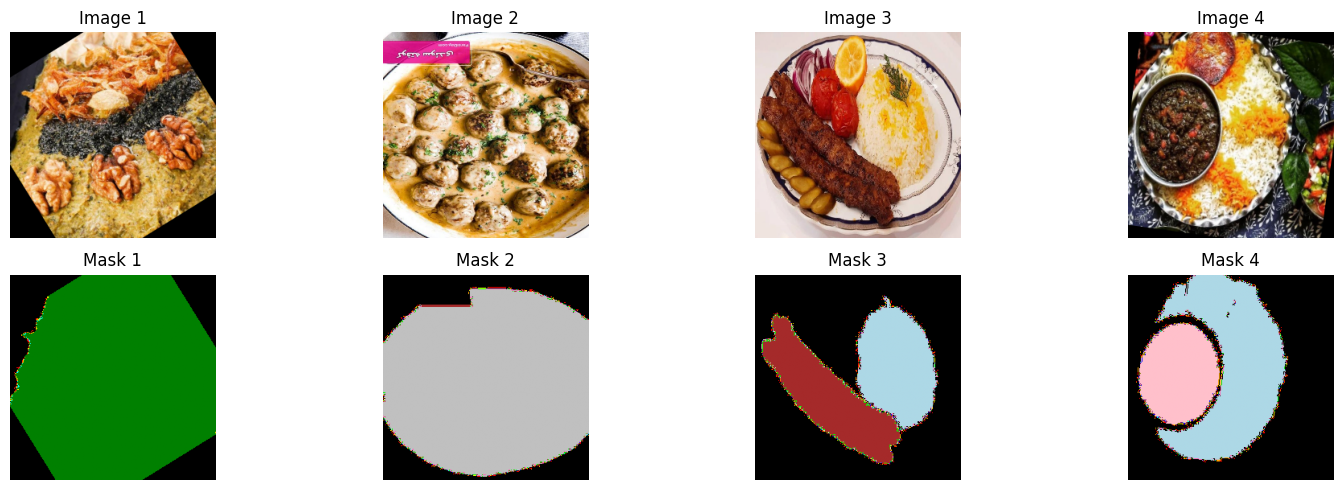

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib.colors import ListedColormap

# Define fixed colors for 15 classes (including background)
custom_colors = [
    "#000000", "#FF0000", "#FFA500", "#FFFF00", "#008000", "#00FFFF",
    "#0000FF", "#800080", "#FFC0CB", "#808000", "#A52A2A", "#00FF00",
    "#C0C0C0", "#FF69B4", "#ADD8E6"
]
fixed_cmap = ListedColormap(custom_colors)

# Class mapping
class_mapping = {
    0: "background", 1: "chicken", 2: "chicken_kabab", 3: "chicken_nugget",
    4: "eggplant_with_wey", 5: "fesenjan_stew", 6: "fish", 7: "gheyme_stew",
    8: "ghorme_sabzi_stew", 9: "hamburger", 10: "kabab", 11: "macaroni",
    12: "meatballs", 13: "pizza", 14: "rice"
}

# Unnormalize function
def unnormalize_image(tensor, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
    tensor = tensor.clone()
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

# Get a batch
for images, masks in train_loader:
    break

num_samples = min(4, images.size(0))
fig, axs = plt.subplots(2, num_samples, figsize=(4 * num_samples, 5))

for i in range(num_samples):
    # Image
    img = unnormalize_image(images[i])
    img = img.permute(1, 2, 0).cpu().numpy()
    img = np.clip(img * 255, 0, 255).astype(np.uint8)

    # Mask
    mask = masks[i].squeeze().cpu().numpy()

    # Plot image
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Image {i+1}")
    axs[0, i].axis("off")

    # Plot mask with fixed colors
    axs[1, i].imshow(mask, cmap=fixed_cmap, vmin=0, vmax=14)
    axs[1, i].set_title(f"Mask {i+1}")
    axs[1, i].axis("off")

plt.tight_layout()
plt.show()

### **Valid Batch**

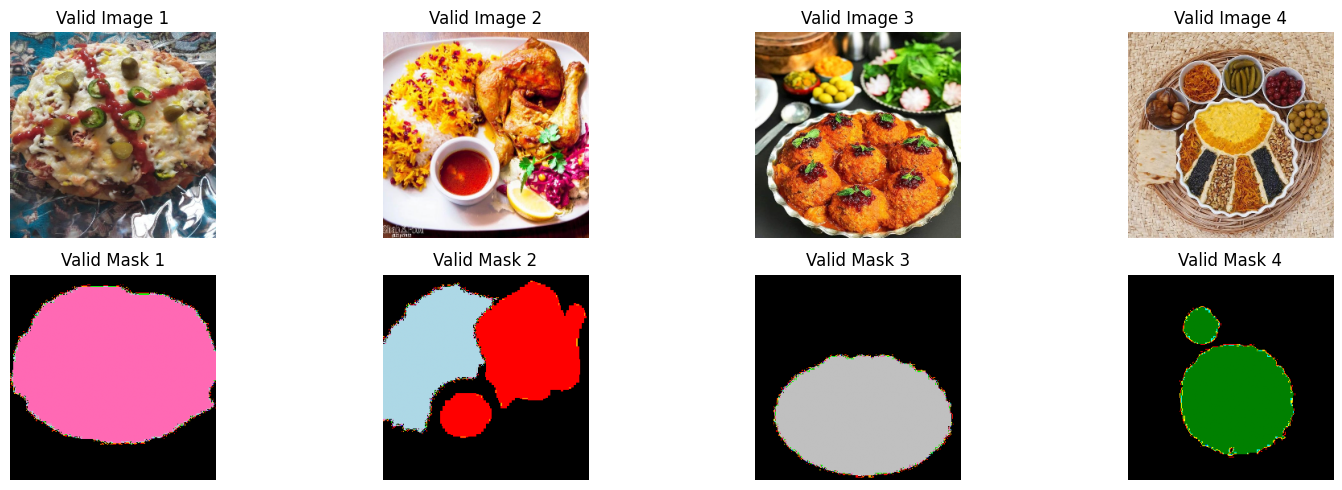

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib.colors import ListedColormap

# Define fixed colors for 15 classes (including background)
custom_colors = [
    "#000000", "#FF0000", "#FFA500", "#FFFF00", "#008000", "#00FFFF",
    "#0000FF", "#800080", "#FFC0CB", "#808000", "#A52A2A", "#00FF00",
    "#C0C0C0", "#FF69B4", "#ADD8E6"
]
fixed_cmap = ListedColormap(custom_colors)

# Class mapping
class_mapping = {
    0: "background", 1: "chicken", 2: "chicken_kabab", 3: "chicken_nugget",
    4: "eggplant_with_wey", 5: "fesenjan_stew", 6: "fish", 7: "gheyme_stew",
    8: "ghorme_sabzi_stew", 9: "hamburger", 10: "kabab", 11: "macaroni",
    12: "meatballs", 13: "pizza", 14: "rice"
}

# Unnormalize function
def unnormalize_image(tensor, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
    tensor = tensor.clone()
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

# Get a batch from validation set
for images, masks in valid_loader:
    break

num_samples = min(4, images.size(0))
fig, axs = plt.subplots(2, num_samples, figsize=(4 * num_samples, 5))

for i in range(num_samples):
    # Image
    img = unnormalize_image(images[i])
    img = img.permute(1, 2, 0).cpu().numpy()
    img = np.clip(img * 255, 0, 255).astype(np.uint8)

    # Mask
    mask = masks[i].squeeze().cpu().numpy()

    # Plot image
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Valid Image {i+1}")
    axs[0, i].axis("off")

    # Plot mask with fixed colors
    axs[1, i].imshow(mask, cmap=fixed_cmap, vmin=0, vmax=14)
    axs[1, i].set_title(f"Valid Mask {i+1}")
    axs[1, i].axis("off")

plt.tight_layout()
plt.show()


### **Test Bacth**

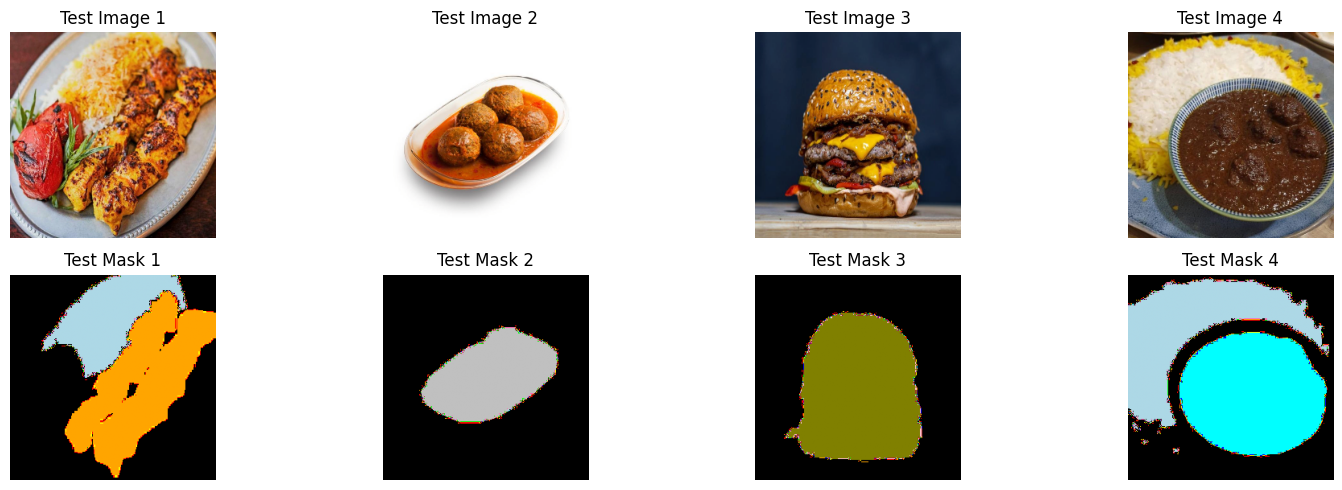

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib.colors import ListedColormap

# Define fixed colors for 15 classes (including background)
custom_colors = [
    "#000000", "#FF0000", "#FFA500", "#FFFF00", "#008000", "#00FFFF",
    "#0000FF", "#800080", "#FFC0CB", "#808000", "#A52A2A", "#00FF00",
    "#C0C0C0", "#FF69B4", "#ADD8E6"
]
fixed_cmap = ListedColormap(custom_colors)

# Class mapping
class_mapping = {
    0: "background", 1: "chicken", 2: "chicken_kabab", 3: "chicken_nugget",
    4: "eggplant_with_wey", 5: "fesenjan_stew", 6: "fish", 7: "gheyme_stew",
    8: "ghorme_sabzi_stew", 9: "hamburger", 10: "kabab", 11: "macaroni",
    12: "meatballs", 13: "pizza", 14: "rice"
}

# Unnormalize function
def unnormalize_image(tensor, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
    tensor = tensor.clone()
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

# Get a batch from test set
for images, masks in test_loader:
    break

num_samples = min(4, images.size(0))
fig, axs = plt.subplots(2, num_samples, figsize=(4 * num_samples, 5))

for i in range(num_samples):
    # Image
    img = unnormalize_image(images[i])
    img = img.permute(1, 2, 0).cpu().numpy()
    img = np.clip(img * 255, 0, 255).astype(np.uint8)

    # Mask
    mask = masks[i].squeeze().cpu().numpy()

    # Plot image
    axs[0, i].imshow(img)
    axs[0, i].set_title(f"Test Image {i+1}")
    axs[0, i].axis("off")

    # Plot mask with fixed colors
    axs[1, i].imshow(mask, cmap=fixed_cmap, vmin=0, vmax=14)
    axs[1, i].set_title(f"Test Mask {i+1}")
    axs[1, i].axis("off")

plt.tight_layout()
plt.show()


## **Final Checking of Batches sizes**

In [ ]:
# Assuming you have train_loader and valid_loader defined
import torch

# Check data type and shape in train_loader
for images, masks in train_loader:
    print("Train Loader:")
    print(f"Images shape:     {images.shape}")
    print(f"Images type:      {type(images)}")
    print(f"Masks shape:      {masks.shape}")
    print(f"Masks type:       {type(masks)}")
    break

print("")

# Check data type and shape in valid_loader
for images, masks in valid_loader:
    print("Validation Loader:")
    print(f"Images shape:     {images.shape}")
    print(f"Images type:      {type(images)}")
    print(f"Masks shape:      {masks.shape}")
    print(f"Masks type:       {type(masks)}")
    break


print("")

# Check data type and shape in valid_loader
for images, masks in valid_loader:
    print("Test Loader:")
    print(f"Images shape:     {images.shape}")
    print(f"Images type:      {type(images)}")
    print(f"Masks shape:      {masks.shape}")
    print(f"Masks type:       {type(masks)}")
    break

Train Loader:
Images shape:     torch.Size([4, 3, 256, 256])
Images type:      <class 'torch.Tensor'>
Masks shape:      torch.Size([4, 1, 256, 256])
Masks type:       <class 'torch.Tensor'>

Validation Loader:
Images shape:     torch.Size([4, 3, 256, 256])
Images type:      <class 'torch.Tensor'>
Masks shape:      torch.Size([4, 1, 256, 256])
Masks type:       <class 'torch.Tensor'>

Test Loader:
Images shape:     torch.Size([4, 3, 256, 256])
Images type:      <class 'torch.Tensor'>
Masks shape:      torch.Size([4, 1, 256, 256])
Masks type:       <class 'torch.Tensor'>


## **Device**

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## **Recalling in and out channels**

In [ ]:
in_channels = 3
out_channels = 15

## **🧠MODELS🧠**

### **🔷Original Undet [64,128,256,512,1024]**


#### **🎀 Main Section [MODEL]**

In [ ]:
#                                                             PyTorch version
# =====================================================================================================================================================
# =====================================================================================================================================================
import torch
import torch.nn as nn

class UNet(nn.Module):

    # ==========================================================================
    def __init__(self, in_channels=None, out_channels=None):
        super(UNet, self).__init__()

        # =======================================
        # Original Unet proposed in => https://arxiv.org/pdf/1505.04597
        filters_model = [64, 128, 256, 512, 1024]
        # =======================================

        # Encoder                                                                                          # This is the down part, known as contracting path
        self.encoder1 = self.conv_block(in_channels, filters_model[0])                                     # Encoder 1 - should have 64 channels
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)                                                 # Pooling 1

        self.encoder2 = self.conv_block(filters_model[0], filters_model[1])                                # Encoder 2 - should have 128 channels
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)                                                 # Pooling 2

        self.encoder3 = self.conv_block(filters_model[1], filters_model[2])                                # Encoder 3 - should have 256 channels
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)                                                 # Pooling 3

        self.encoder4 = self.conv_block(filters_model[2], filters_model[3])                                # Encoder 4 - should have 512 channels
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)                                                 # Pooling 4

        # Bottleneck
        self.bottleneck = self.conv_block(filters_model[3], filters_model[4])                              # The original Unet => bottleneck should have 1024 channels

        # Decoder
        self.upconv4 = nn.ConvTranspose2d(filters_model[4], filters_model[3], kernel_size=2, stride=2)     # Upconv / TransposConv
        self.decoder4 = self.conv_block(filters_model[4], filters_model[3])                                # Decoder 4

        self.upconv3 = nn.ConvTranspose2d(filters_model[3], filters_model[2], kernel_size=2, stride=2)     # Upconv / TransposConv
        self.decoder3 = self.conv_block(filters_model[3], filters_model[2])                                # Decoder 3

        self.upconv2 = nn.ConvTranspose2d(filters_model[2], filters_model[1], kernel_size=2, stride=2)     # Upconv / TransposConv
        self.decoder2 = self.conv_block(filters_model[2], filters_model[1])                                # Decoder 2

        self.upconv1 = nn.ConvTranspose2d(filters_model[1], filters_model[0], kernel_size=2, stride=2)     # Upconv / TransposConv
        self.decoder1 = self.conv_block(filters_model[1], filters_model[0])                                # Decoder 1

        # Final Convolution
        self.conv = nn.Conv2d(filters_model[0], out_channels, kernel_size=1)                               # Final Conv (converting to out_channels)
    # ==========================================================================



    # Conv block
    # ==========================================================================
    def conv_block(self, in_channels, out_channels):                            # This "conv_block" is a base of the encoders/decoders written at the top
        return nn.Sequential(
                            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                            nn.BatchNorm2d(out_channels),
                            nn.ReLU(inplace=True),
                            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
                            nn.BatchNorm2d(out_channels),
                            nn.ReLU(inplace=True),
                            )                                                   # Can be used both as encoder and decoder
    # ==========================================================================




    # ==========================================================================
    def forward(self, x):
        # Encoder path
        enc1 = self.encoder1(x)
        enc1_pool = self.pool1(enc1)

        enc2 = self.encoder2(enc1_pool)
        enc2_pool = self.pool2(enc2)

        enc3 = self.encoder3(enc2_pool)
        enc3_pool = self.pool3(enc3)

        enc4 = self.encoder4(enc3_pool)
        enc4_pool = self.pool4(enc4)

        # Bottleneck
        bottleneck = self.bottleneck(enc4_pool)

        # Decoder path
        dec4 = self.upconv4(bottleneck)
        dec4_cat = torch.cat((dec4, enc4), dim=1)                               # Skip connection (dim=1 means concatenate them from channels)
        dec4_out = self.decoder4(dec4_cat)

        dec3 = self.upconv3(dec4_out)
        dec3_cat = torch.cat((dec3, enc3), dim=1)                               # Skip connection (dim=1 means concatenate them from channels)
        dec3_out = self.decoder3(dec3_cat)

        dec2 = self.upconv2(dec3_out)
        dec2_cat = torch.cat((dec2, enc2), dim=1)                               # Skip connection (dim=1 means concatenate them from channels)
        dec2_out = self.decoder2(dec2_cat)

        dec1 = self.upconv1(dec2_out)
        dec1_cat = torch.cat((dec1, enc1), dim=1)                               # Skip connection (dim=1 means concatenate them from channels)
        dec1_out = self.decoder1(dec1_cat)

        return self.conv(dec1_out)
    # ==========================================================================

#### **🎀 ? Check Section ?**

In [ ]:
# Example of how to create an instance of the U-Net model
# ========================================================================================================
if __name__ == "__main__":
    model = UNet(in_channels=in_channels, out_channels=out_channels)            # RGB input and binary output => out_channels
    # print(model)                                                                # Print the model architecture


# Example input tensor
# ========================================================================================================
print(f"Image size is: {image_size}")
print("")
x_example = torch.randn(4, 3, image_size , image_size)                          # The first number is the Batch Size
output_example = model(x_example)
print(f"Output shape: {output_example.shape}")                                  # 4*out_channel*image_size*image_size is expected

Image size is: 256

Output shape: torch.Size([4, 15, 256, 256])


In [ ]:
if __name__ == "__main__":
    model = UNet(in_channels, out_channels)                                     # RGB input and binary output
# ==============================================================================
# Calculate total and trainable parameters
total_params     = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Convert to millions
total_params_millions = total_params         / 1_000_000
trainable_params_millions = trainable_params / 1_000_000

# Print results
print("================================================================")
print("================================================================")
print(f"Total Parameters:        {total_params_millions}        million")
print(f"Trainable Parameters:    {trainable_params_millions}    million")

Total Parameters:        31.044431        million
Trainable Parameters:    31.044431    million


### **🔷Smaller Unet [32,64,128,256,512]**

Smaller Unet [32,64,128,256,512 instead of 64,128,256,512,1024]

#### **🎀 Main Section [MODEL]**

In [ ]:
import torch
import torch.nn as nn

class SmallerUNet(nn.Module):
    def __init__(self, in_channels=None, out_channels=None):
        super(SmallerUNet, self).__init__()

        # Smaller U-Net architecture (halved filters from original U-Net)
        filters_model = [32, 64, 128, 256, 512]                                  # [32,64,128,256,512] instead of [64,128,526,512, and 1024]

        # Encoder (contracting path)
        self.encoder1 = self.conv_block(in_channels, filters_model[0])
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder2 = self.conv_block(filters_model[0], filters_model[1])
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder3 = self.conv_block(filters_model[1], filters_model[2])
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.encoder4 = self.conv_block(filters_model[2], filters_model[3])
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Bottleneck
        self.bottleneck = self.conv_block(filters_model[3], filters_model[4])

        # Decoder (expanding path)
        self.upconv4 = nn.ConvTranspose2d(filters_model[4], filters_model[3], kernel_size=2, stride=2)
        self.decoder4 = self.conv_block(filters_model[4], filters_model[3])

        self.upconv3 = nn.ConvTranspose2d(filters_model[3], filters_model[2], kernel_size=2, stride=2)
        self.decoder3 = self.conv_block(filters_model[3], filters_model[2])

        self.upconv2 = nn.ConvTranspose2d(filters_model[2], filters_model[1], kernel_size=2, stride=2)
        self.decoder2 = self.conv_block(filters_model[2], filters_model[1])

        self.upconv1 = nn.ConvTranspose2d(filters_model[1], filters_model[0], kernel_size=2, stride=2)
        self.decoder1 = self.conv_block(filters_model[1], filters_model[0])

        # Final classifier
        self.conv = nn.Conv2d(filters_model[0], out_channels, kernel_size=1)

    # Shared conv block for encoder/decoder
    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        # Encoder
        enc1 = self.encoder1(x)
        enc1_pool = self.pool1(enc1)

        enc2 = self.encoder2(enc1_pool)
        enc2_pool = self.pool2(enc2)

        enc3 = self.encoder3(enc2_pool)
        enc3_pool = self.pool3(enc3)

        enc4 = self.encoder4(enc3_pool)
        enc4_pool = self.pool4(enc4)

        # Bottleneck
        bottleneck = self.bottleneck(enc4_pool)

        # Decoder
        dec4 = self.upconv4(bottleneck)
        dec4_cat = torch.cat((dec4, enc4), dim=1)
        dec4_out = self.decoder4(dec4_cat)

        dec3 = self.upconv3(dec4_out)
        dec3_cat = torch.cat((dec3, enc3), dim=1)
        dec3_out = self.decoder3(dec3_cat)

        dec2 = self.upconv2(dec3_out)
        dec2_cat = torch.cat((dec2, enc2), dim=1)
        dec2_out = self.decoder2(dec2_cat)

        dec1 = self.upconv1(dec2_out)
        dec1_cat = torch.cat((dec1, enc1), dim=1)
        dec1_out = self.decoder1(dec1_cat)

        return self.conv(dec1_out)

#### **🎀 ? Check Section ?**

In [ ]:
# Example of how to create an instance of the U-Net model
# ========================================================================================================
if __name__ == "__main__":
    model = SmallerUNet(in_channels=in_channels, out_channels=out_channels)       # RGB input and binary output => out_channels
    # print(model)                                                                # Print the model architecture


# Example input tensor
# ========================================================================================================
print(f"Image size is: {image_size}")
print("")
x_example = torch.randn(4, 3, image_size , image_size)                          # The first number is the Batch Size
output_example = model(x_example)
print(f"Output shape: {output_example.shape}")                                  # 4*out_channel*image_size*image_size is expected

Image size is: 256

Output shape: torch.Size([4, 15, 256, 256])


In [ ]:
#                                 PyTorch version
# ==============================================================================

if __name__ == "__main__":
    model = SmallerUNet(in_channels, out_channels)                                     # RGB input and binary output
# ==============================================================================
# Calculate total and trainable parameters
total_params     = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Convert to millions
total_params_millions = total_params         / 1_000_000
trainable_params_millions = trainable_params / 1_000_000

# Print results
print("================================================================")
print("================================================================")
print(f"Total Parameters:        {total_params_millions}        million")
print(f"Trainable Parameters:    {trainable_params_millions}    million")

Total Parameters:        7.766447        million
Trainable Parameters:    7.766447    million


### **🔷Nest Net Large [64,128,256,512,1024]**

#### **🎀 Main Section [MODEL]**

In [ ]:
#                         CLASS & Based on PyTorch (OK)
# ==============================================================================
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the NestNet class
class NestNet(nn.Module):
    def __init__(self, in_channels=None, out_channels=None):

        super(NestNet, self).__init__()
        # Initialize parameters for the network
        self.in_channels  = in_channels
        self.out_channels = out_channels

        # Better version
        self.nb_filter = [64, 128, 256, 512, 1024]
        # LESS version
        # self.nb_filter = [32, 64, 128, 256, 512]

        # Define layers
        # Contracting path layers
        self.conv1_1 = self.standard_pool_unit(self.in_channels, self.nb_filter[0])
        self.conv2_1 = self.standard_pool_unit(self.nb_filter[0], self.nb_filter[1])
        self.conv3_1 = self.standard_pool_unit(self.nb_filter[1], self.nb_filter[2])
        self.conv4_1 = self.standard_pool_unit(self.nb_filter[2], self.nb_filter[3])
        self.conv5_1 = self.standard_unit(self.nb_filter[3], self.nb_filter[4])

        # Nested blocks
        self.conv1_2 = self.standard_unit(self.nb_filter[0] * 2, self.nb_filter[0])
        self.conv2_2 = self.standard_unit(self.nb_filter[1] * 2, self.nb_filter[1])
        self.conv1_3 = self.standard_unit(self.nb_filter[0] * 3, self.nb_filter[0])
        self.conv3_2 = self.standard_unit(self.nb_filter[2] * 2, self.nb_filter[2])
        self.conv2_3 = self.standard_unit(self.nb_filter[1] * 3, self.nb_filter[1])
        self.conv1_4 = self.standard_unit(self.nb_filter[0] * 4, self.nb_filter[0])
        self.conv4_2 = self.standard_unit(self.nb_filter[3] * 2, self.nb_filter[3])
        self.conv3_3 = self.standard_unit(self.nb_filter[2] * 3, self.nb_filter[2])
        self.conv2_4 = self.standard_unit(self.nb_filter[1] * 4, self.nb_filter[1])
        self.conv1_5 = self.standard_unit(self.nb_filter[0] * 5, self.nb_filter[0])

        # Transpose convolution (upsampling)
        self.up1_2 = nn.ConvTranspose2d(self.nb_filter[1], self.nb_filter[0], kernel_size=2, stride=2)
        self.up1_3 = nn.ConvTranspose2d(self.nb_filter[1], self.nb_filter[0], kernel_size=2, stride=2)
        self.up2_2 = nn.ConvTranspose2d(self.nb_filter[2], self.nb_filter[1], kernel_size=2, stride=2)
        self.up2_3 = nn.ConvTranspose2d(self.nb_filter[2], self.nb_filter[1], kernel_size=2, stride=2)
        self.up2_4 = nn.ConvTranspose2d(self.nb_filter[2], self.nb_filter[1], kernel_size=2, stride=2)
        self.up3_2 = nn.ConvTranspose2d(self.nb_filter[3], self.nb_filter[2], kernel_size=2, stride=2)
        self.up3_3 = nn.ConvTranspose2d(self.nb_filter[3], self.nb_filter[2], kernel_size=2, stride=2)
        self.up4_2 = nn.ConvTranspose2d(self.nb_filter[4], self.nb_filter[3], kernel_size=2, stride=2)
        self.up1_4 = nn.ConvTranspose2d(self.nb_filter[1], self.nb_filter[0], kernel_size=2, stride=2)
        self.up1_5 = nn.ConvTranspose2d(self.nb_filter[1], self.nb_filter[0], kernel_size=2, stride=2)

        # Output layer
        self.output_layer = nn.Conv2d(self.nb_filter[0], self.out_channels, kernel_size=1, padding=0)

    # ===============================================================================================
    def standard_pool_unit(self, in_channels, out_channels, kernel_size=3):
        act = nn.ReLU(inplace=True)
        layers = [
                  nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=1, bias=False),
                  nn.BatchNorm2d(out_channels),
                  act,
                  nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, padding=1, bias=False),
                  nn.BatchNorm2d(out_channels),
                  act
                  ]
        return nn.Sequential(*layers)

    def standard_unit(self, in_channels, out_channels, kernel_size=3):
        act = nn.ReLU(inplace=True)
        layers = [
                  nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=1, bias=False),
                  act,
                  nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, padding=1, bias=False),
                  act
                  ]
        return nn.Sequential(*layers)
    # ================================================================================================


    def forward(self, x):
        # Contracting path (going down) + Creating nested blocks
        # ======================================================
        # Block 1*1
        conv1_1 = self.conv1_1(x)
        pool1 = F.max_pool2d(conv1_1, kernel_size=2)

        # Block 2*1
        conv2_1 = self.conv2_1(pool1)
        pool2 = F.max_pool2d(conv2_1, kernel_size=2)

        # Block 1*2
        up1_2 = self.up1_2(conv2_1)
        conv1_2 = torch.cat([up1_2, conv1_1], dim=1)
        conv1_2 = self.conv1_2(conv1_2)

        # Block 3*1
        conv3_1 = self.conv3_1(pool2)
        pool3 = F.max_pool2d(conv3_1, kernel_size=2)

        # Block 2*2
        up2_2 = self.up2_2(conv3_1)
        conv2_2 = torch.cat([up2_2, conv2_1], dim=1)
        conv2_2 = self.conv2_2(conv2_2)

        # Block 1*3
        up1_3 = self.up1_3(conv2_2)
        conv1_3 = torch.cat([up1_3, conv1_1, conv1_2], dim=1)
        conv1_3 = self.conv1_3(conv1_3)

        # Block 4*1
        conv4_1 = self.conv4_1(pool3)
        drop4 = F.dropout(conv4_1, p=0.5, training=self.training)
        pool4 = F.max_pool2d(drop4, kernel_size=2)

        # Block 3*2
        up3_2 = self.up3_2(conv4_1)
        conv3_2 = torch.cat([up3_2, conv3_1], dim=1)
        conv3_2 = self.conv3_2(conv3_2)

        # Block 2*3
        up2_3 = self.up2_3(conv3_2)
        conv2_3 = torch.cat([up2_3, conv2_1, conv2_2], dim=1)
        conv2_3 = self.conv2_3(conv2_3)

        # Block 1*4
        up1_4 = self.up1_4(conv2_3)
        conv1_4 = torch.cat([up1_4, conv1_1, conv1_2, conv1_3], dim=1)
        conv1_4 = self.conv1_4(conv1_4)

        # Block 5*1 => Bottleneck
        conv5_1 = self.conv5_1(pool4)
        conv5_1 = F.dropout(conv5_1, p=0.5, training=self.training)

        # Upconv / Decoder / going up + Nested blocks
        # ======================================================
        # Block 4*2
        up4_2 = self.up4_2(conv5_1)
        conv4_2 = torch.cat([up4_2, conv4_1], dim=1)
        conv4_2 = self.conv4_2(conv4_2)

        # Block 3*3
        up3_3 = self.up3_3(conv4_2)
        conv3_3 = torch.cat([up3_3, conv3_1, conv3_2], dim=1)
        conv3_3 = self.conv3_3(conv3_3)

        # Block 2*4
        up2_4 = self.up2_4(conv3_3)
        conv2_4 = torch.cat([up2_4, conv2_1, conv2_2, conv2_3], dim=1)
        conv2_4 = self.conv2_4(conv2_4)

        # Block 1*5
        up1_5 = self.up1_5(conv2_4)
        conv1_5 = torch.cat([up1_5, conv1_1, conv1_2, conv1_3, conv1_4], dim=1)
        conv1_5 = self.conv1_5(conv1_5)

        # Output layer
        output = self.output_layer(conv1_5)
        return output

#### **🎀 ? Check Section ?**

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# if __name__ == "__main__":
#     # Create an instance of the NestNet model
#     model = NestNet(in_channels=in_channels, out_channels=out_channels)
#     model.to(device)

#     # Generate a random input tensor with dynamic size and move it to the correct device
#     random_input = torch.randn(1, 3, 256, 256).to(device)  # Move input tensor to the same device as the model

#     # Pass the input through the model
#     output = model(random_input)

#     # Print the output shape
#     print("Output shape:", output.shape)

Output shape: torch.Size([1, 15, 256, 256])


In [ ]:
#                                 PyTorch version
# ==============================================================================
## Example of how to create an instance of the U-Net model
nest_net = NestNet(in_channels=in_channels, out_channels=out_channels)
# ==============================================================================
# Calculate total and trainable parameters
total_params     = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Convert to millions
total_params_millions = total_params / 1_000_000
trainable_params_millions = trainable_params / 1_000_000

# Print results
print("================================================================")
print("================================================================")
print(f"Total Parameters:        {total_params_millions}        million")
print(f"Trainable Parameters:    {trainable_params_millions}    million")

Total Parameters:        36.155407        million
Trainable Parameters:    36.155407    million


#### **🎀 ??? In-depth Check (Done. You should NOT run it anymore) ???**

In [ ]:
# # The follwing code is only and only designed for an in-depth check. If you run that, comment it again, then run the notebook from the ground up


# # Assuming the class definition for NestNet is already defined and imported as per your code above

# # Create a sample input tensor
# image_like_tensor_for_example = torch.randn(1, 3, 64, 64)  # [batch_size, channels, height, width]

# # Instantiate the model
# model = NestNet(in_channels=in_channels, out_channels=out_channels)  # Adjust output channels as needed

# # Update the forward function to include shape printing
# def modified_forward(self, x):
#     # Contracting path (going down) + Creating nested blocks
#     # ======================================================
#     print("Input shape:", x.shape)
#     print("")
#     # Block 1*1
#     conv1_1 = self.conv1_1(x)
#     print("After conv1_1:", conv1_1.shape)
#     pool1 = F.max_pool2d(conv1_1, kernel_size=2)
#     print("After pool1:", pool1.shape)
#     print("")
#     # Block 2*1
#     conv2_1 = self.conv2_1(pool1)
#     print("After conv2_1:", conv2_1.shape)
#     pool2 = F.max_pool2d(conv2_1, kernel_size=2)
#     print("After pool2:", pool2.shape)
#     print("")
#     # Block 1*2
#     up1_2 = self.up1_2(conv2_1)
#     print("After up1_2:", up1_2.shape)
#     conv1_2 = torch.cat([up1_2, conv1_1], dim=1)
#     print("After concat conv1_2:", conv1_2.shape)
#     conv1_2 = self.conv1_2(conv1_2)
#     print("After conv1_2:", conv1_2.shape)
#     print("")
#     # Block 3*1
#     conv3_1 = self.conv3_1(pool2)
#     print("After conv3_1:", conv3_1.shape)
#     pool3 = F.max_pool2d(conv3_1, kernel_size=2)
#     print("After pool3:", pool3.shape)
#     print("")
#     # Block 2*2
#     up2_2 = self.up2_2(conv3_1)
#     print("After up2_2:", up2_2.shape)
#     conv2_2 = torch.cat([up2_2, conv2_1], dim=1)
#     print("After concat conv2_2:", conv2_2.shape)
#     conv2_2 = self.conv2_2(conv2_2)
#     print("After conv2_2:", conv2_2.shape)
#     print("")
#     # Block 1*3
#     up1_3 = self.up1_3(conv2_2)
#     print("After up1_3:", up1_3.shape)
#     conv1_3 = torch.cat([up1_3, conv1_1, conv1_2], dim=1)
#     print("After concat conv1_3:", conv1_3.shape)
#     conv1_3 = self.conv1_3(conv1_3)
#     print("After conv1_3:", conv1_3.shape)
#     print("")
#     # Block 4*1
#     conv4_1 = self.conv4_1(pool3)
#     print("After conv4_1:", conv4_1.shape)
#     drop4 = F.dropout(conv4_1, p=0.5, training=self.training)
#     print("After dropout drop4:", drop4.shape)
#     pool4 = F.max_pool2d(drop4, kernel_size=2)
#     print("After pool4:", pool4.shape)
#     print("")
#     # Block 3*2
#     up3_2 = self.up3_2(conv4_1)
#     print("After up3_2:", up3_2.shape)
#     conv3_2 = torch.cat([up3_2, conv3_1], dim=1)
#     print("After concat conv3_2:", conv3_2.shape)
#     conv3_2 = self.conv3_2(conv3_2)
#     print("After conv3_2:", conv3_2.shape)
#     print("")
#     # Block 2*3
#     up2_3 = self.up2_3(conv3_2)
#     print("After up2_3:", up2_3.shape)
#     conv2_3 = torch.cat([up2_3, conv2_1, conv2_2], dim=1)
#     print("After concat conv2_3:", conv2_3.shape)
#     conv2_3 = self.conv2_3(conv2_3)
#     print("After conv2_3:", conv2_3.shape)
#     print("")
#     # Block 1*4
#     up1_4 = self.up1_4(conv2_3)
#     print("After up1_4:", up1_4.shape)
#     conv1_4 = torch.cat([up1_4, conv1_1, conv1_2, conv1_3], dim=1)
#     print("After concat conv1_4:", conv1_4.shape)
#     conv1_4 = self.conv1_4(conv1_4)
#     print("After conv1_4:", conv1_4.shape)
#     print("")
#     # Block 5*1 => Bottleneck
#     conv5_1 = self.conv5_1(pool4)
#     print("After conv5_1:", conv5_1.shape)
#     conv5_1 = F.dropout(conv5_1, p=0.5, training=self.training)
#     print("After dropout conv5_1:", conv5_1.shape)
#     print("")
#     # Upconv / Decoder / going up + Nested blocks
#     # ======================================================
#     # Block 4*2
#     up4_2 = self.up4_2(conv5_1)
#     print("After up4_2:", up4_2.shape)
#     conv4_2 = torch.cat([up4_2, conv4_1], dim=1)
#     print("After concat conv4_2:", conv4_2.shape)
#     conv4_2 = self.conv4_2(conv4_2)
#     print("After conv4_2:", conv4_2.shape)
#     print("")
#     # Block 3*3
#     up3_3 = self.up3_3(conv4_2)
#     print("After up3_3:", up3_3.shape)
#     conv3_3 = torch.cat([up3_3, conv3_1, conv3_2], dim=1)
#     print("After concat conv3_3:", conv3_3.shape)
#     conv3_3 = self.conv3_3(conv3_3)
#     print("After conv3_3:", conv3_3.shape)
#     print("")
#     # Block 2*4
#     up2_4 = self.up2_4(conv3_3)
#     print("After up2_4:", up2_4.shape)
#     conv2_4 = torch.cat([up2_4, conv2_1, conv2_2, conv2_3], dim=1)
#     print("After concat conv2_4:", conv2_4.shape)
#     conv2_4 = self.conv2_4(conv2_4)
#     print("After conv2_4:", conv2_4.shape)
#     print("")
#     # Block 1*5
#     up1_5 = self.up1_5(conv2_4)
#     print("After up1_5:", up1_5.shape)
#     conv1_5 = torch.cat([up1_5, conv1_1, conv1_2, conv1_3, conv1_4], dim=1)
#     print("After concat conv1_5:", conv1_5.shape)
#     conv1_5 = self.conv1_5(conv1_5)
#     print("After conv1_5:", conv1_5.shape)
#     print("")
#     # Output layer
#     output = self.output_layer(conv1_5)
#     print("After output layer:", output.shape)
#     return output
#     print("")

# # Bind the modified forward function to our model
# model.forward = modified_forward.__get__(model, NestNet)

# # Run the model with the sample input
# output = model(image_like_tensor_for_example)


### **🔷Smaller Nest Net  [32,64,128,256,512]**

#### **🎀 Main Section [MODEL]**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the Smaller_NestNet class (Lightweight U-Net++)
class Smaller_NestNet(nn.Module):
    def __init__(self, in_channels=None, out_channels=None):
        super(Smaller_NestNet, self).__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels

        # Lightweight version with fewer filters
        self.nb_filter = [32, 64, 128, 256, 512]

        # Contracting path (encoder)
        self.conv1_1 = self.standard_pool_unit(self.in_channels, self.nb_filter[0])
        self.conv2_1 = self.standard_pool_unit(self.nb_filter[0], self.nb_filter[1])
        self.conv3_1 = self.standard_pool_unit(self.nb_filter[1], self.nb_filter[2])
        self.conv4_1 = self.standard_pool_unit(self.nb_filter[2], self.nb_filter[3])
        self.conv5_1 = self.standard_unit(self.nb_filter[3], self.nb_filter[4])  # bottleneck

        # Nested decoder blocks
        self.conv1_2 = self.standard_unit(self.nb_filter[0] * 2, self.nb_filter[0])
        self.conv2_2 = self.standard_unit(self.nb_filter[1] * 2, self.nb_filter[1])
        self.conv1_3 = self.standard_unit(self.nb_filter[0] * 3, self.nb_filter[0])
        self.conv3_2 = self.standard_unit(self.nb_filter[2] * 2, self.nb_filter[2])
        self.conv2_3 = self.standard_unit(self.nb_filter[1] * 3, self.nb_filter[1])
        self.conv1_4 = self.standard_unit(self.nb_filter[0] * 4, self.nb_filter[0])
        self.conv4_2 = self.standard_unit(self.nb_filter[3] * 2, self.nb_filter[3])
        self.conv3_3 = self.standard_unit(self.nb_filter[2] * 3, self.nb_filter[2])
        self.conv2_4 = self.standard_unit(self.nb_filter[1] * 4, self.nb_filter[1])
        self.conv1_5 = self.standard_unit(self.nb_filter[0] * 5, self.nb_filter[0])

        # Upsampling blocks
        self.up1_2 = nn.ConvTranspose2d(self.nb_filter[1], self.nb_filter[0], kernel_size=2, stride=2)
        self.up1_3 = nn.ConvTranspose2d(self.nb_filter[1], self.nb_filter[0], kernel_size=2, stride=2)
        self.up1_4 = nn.ConvTranspose2d(self.nb_filter[1], self.nb_filter[0], kernel_size=2, stride=2)
        self.up1_5 = nn.ConvTranspose2d(self.nb_filter[1], self.nb_filter[0], kernel_size=2, stride=2)

        self.up2_2 = nn.ConvTranspose2d(self.nb_filter[2], self.nb_filter[1], kernel_size=2, stride=2)
        self.up2_3 = nn.ConvTranspose2d(self.nb_filter[2], self.nb_filter[1], kernel_size=2, stride=2)
        self.up2_4 = nn.ConvTranspose2d(self.nb_filter[2], self.nb_filter[1], kernel_size=2, stride=2)

        self.up3_2 = nn.ConvTranspose2d(self.nb_filter[3], self.nb_filter[2], kernel_size=2, stride=2)
        self.up3_3 = nn.ConvTranspose2d(self.nb_filter[3], self.nb_filter[2], kernel_size=2, stride=2)

        self.up4_2 = nn.ConvTranspose2d(self.nb_filter[4], self.nb_filter[3], kernel_size=2, stride=2)

        # Final output layer
        self.output_layer = nn.Conv2d(self.nb_filter[0], self.out_channels, kernel_size=1, padding=0)

    # Standard encoder block
    def standard_pool_unit(self, in_channels, out_channels, kernel_size=3):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    # Standard decoder block
    def standard_unit(self, in_channels, out_channels, kernel_size=3):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, padding=1, bias=False),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        # Encoder
        conv1_1 = self.conv1_1(x)
        pool1 = F.max_pool2d(conv1_1, kernel_size=2)

        conv2_1 = self.conv2_1(pool1)
        pool2 = F.max_pool2d(conv2_1, kernel_size=2)

        up1_2 = self.up1_2(conv2_1)
        conv1_2 = self.conv1_2(torch.cat([up1_2, conv1_1], dim=1))

        conv3_1 = self.conv3_1(pool2)
        pool3 = F.max_pool2d(conv3_1, kernel_size=2)

        up2_2 = self.up2_2(conv3_1)
        conv2_2 = self.conv2_2(torch.cat([up2_2, conv2_1], dim=1))

        up1_3 = self.up1_3(conv2_2)
        conv1_3 = self.conv1_3(torch.cat([up1_3, conv1_1, conv1_2], dim=1))

        conv4_1 = self.conv4_1(pool3)
        drop4 = F.dropout(conv4_1, p=0.5, training=self.training)
        pool4 = F.max_pool2d(drop4, kernel_size=2)

        up3_2 = self.up3_2(conv4_1)
        conv3_2 = self.conv3_2(torch.cat([up3_2, conv3_1], dim=1))

        up2_3 = self.up2_3(conv3_2)
        conv2_3 = self.conv2_3(torch.cat([up2_3, conv2_1, conv2_2], dim=1))

        up1_4 = self.up1_4(conv2_3)
        conv1_4 = self.conv1_4(torch.cat([up1_4, conv1_1, conv1_2, conv1_3], dim=1))

        conv5_1 = self.conv5_1(pool4)
        conv5_1 = F.dropout(conv5_1, p=0.5, training=self.training)

        up4_2 = self.up4_2(conv5_1)
        conv4_2 = self.conv4_2(torch.cat([up4_2, conv4_1], dim=1))

        up3_3 = self.up3_3(conv4_2)
        conv3_3 = self.conv3_3(torch.cat([up3_3, conv3_1, conv3_2], dim=1))

        up2_4 = self.up2_4(conv3_3)
        conv2_4 = self.conv2_4(torch.cat([up2_4, conv2_1, conv2_2, conv2_3], dim=1))

        up1_5 = self.up1_5(conv2_4)
        conv1_5 = self.conv1_5(torch.cat([up1_5, conv1_1, conv1_2, conv1_3, conv1_4], dim=1))

        return self.output_layer(conv1_5)


#### **🎀 ? Check Section ?**

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
if __name__ == "__main__":
    # Create an instance of the NestNet model
    model = Smaller_NestNet(in_channels=in_channels, out_channels=out_channels)
    model.to(device)

    # Generate a random input tensor with dynamic size and move it to the correct device
    random_input = torch.randn(1, 3, 256, 256).to(device)  # Move input tensor to the same device as the model

    # Pass the input through the model
    output = model(random_input)

    # Print the output shape
    print("Output shape:", output.shape)

Output shape: torch.Size([1, 15, 256, 256])


In [ ]:
# Define your channel setup
in_channels = 3
out_channels = 15

# Instantiate the model
model = Smaller_NestNet(in_channels=in_channels, out_channels=out_channels)

# Count total and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("🧠 Total Parameters:     ", total_params)
print("🛠️ Trainable Parameters:", trainable_params)      # should be approximately 9 million

🧠 Total Parameters:      9040911
🛠️ Trainable Parameters: 9040911


#### **🎀 ??? In-depth Check (Done, you should NOT run it anymore) ???**

In [ ]:
# import torch
# import torch.nn.functional as F

# # Parameters
# in_channels = 3
# out_channels = 15

# # Dummy input
# image_like_tensor_for_example = torch.randn(1, in_channels, 64, 64)

# # Instantiate the model
# model = Smaller_NestNet(in_channels=in_channels, out_channels=out_channels)

# # Modified forward function to inspect shapes
# def modified_forward(self, x):
#     print("Input shape:", x.shape, "\n")

#     conv1_1 = self.conv1_1(x)
#     print("conv1_1:", conv1_1.shape)
#     pool1 = F.max_pool2d(conv1_1, 2)
#     print("pool1:", pool1.shape, "\n")

#     conv2_1 = self.conv2_1(pool1)
#     print("conv2_1:", conv2_1.shape)
#     pool2 = F.max_pool2d(conv2_1, 2)
#     print("pool2:", pool2.shape, "\n")

#     up1_2 = self.up1_2(conv2_1)
#     print("up1_2:", up1_2.shape)
#     conv1_2 = self.conv1_2(torch.cat([up1_2, conv1_1], dim=1))
#     print("conv1_2:", conv1_2.shape, "\n")

#     conv3_1 = self.conv3_1(pool2)
#     print("conv3_1:", conv3_1.shape)
#     pool3 = F.max_pool2d(conv3_1, 2)
#     print("pool3:", pool3.shape, "\n")

#     up2_2 = self.up2_2(conv3_1)
#     print("up2_2:", up2_2.shape)
#     conv2_2 = self.conv2_2(torch.cat([up2_2, conv2_1], dim=1))
#     print("conv2_2:", conv2_2.shape, "\n")

#     up1_3 = self.up1_3(conv2_2)
#     print("up1_3:", up1_3.shape)
#     conv1_3 = self.conv1_3(torch.cat([up1_3, conv1_1, conv1_2], dim=1))
#     print("conv1_3:", conv1_3.shape, "\n")

#     conv4_1 = self.conv4_1(pool3)
#     print("conv4_1:", conv4_1.shape)
#     drop4 = F.dropout(conv4_1, p=0.5, training=self.training)
#     print("drop4:", drop4.shape)
#     pool4 = F.max_pool2d(drop4, 2)
#     print("pool4:", pool4.shape, "\n")

#     up3_2 = self.up3_2(conv4_1)
#     print("up3_2:", up3_2.shape)
#     conv3_2 = self.conv3_2(torch.cat([up3_2, conv3_1], dim=1))
#     print("conv3_2:", conv3_2.shape, "\n")

#     up2_3 = self.up2_3(conv3_2)
#     print("up2_3:", up2_3.shape)
#     conv2_3 = self.conv2_3(torch.cat([up2_3, conv2_1, conv2_2], dim=1))
#     print("conv2_3:", conv2_3.shape, "\n")

#     up1_4 = self.up1_4(conv2_3)
#     print("up1_4:", up1_4.shape)
#     conv1_4 = self.conv1_4(torch.cat([up1_4, conv1_1, conv1_2, conv1_3], dim=1))
#     print("conv1_4:", conv1_4.shape, "\n")

#     conv5_1 = self.conv5_1(pool4)
#     print("conv5_1:", conv5_1.shape)
#     conv5_1 = F.dropout(conv5_1, p=0.5, training=self.training)
#     print("dropout conv5_1:", conv5_1.shape, "\n")

#     up4_2 = self.up4_2(conv5_1)
#     print("up4_2:", up4_2.shape)
#     conv4_2 = self.conv4_2(torch.cat([up4_2, conv4_1], dim=1))
#     print("conv4_2:", conv4_2.shape, "\n")

#     up3_3 = self.up3_3(conv4_2)
#     print("up3_3:", up3_3.shape)
#     conv3_3 = self.conv3_3(torch.cat([up3_3, conv3_1, conv3_2], dim=1))
#     print("conv3_3:", conv3_3.shape, "\n")

#     up2_4 = self.up2_4(conv3_3)
#     print("up2_4:", up2_4.shape)
#     conv2_4 = self.conv2_4(torch.cat([up2_4, conv2_1, conv2_2, conv2_3], dim=1))
#     print("conv2_4:", conv2_4.shape, "\n")

#     up1_5 = self.up1_5(conv2_4)
#     print("up1_5:", up1_5.shape)
#     conv1_5 = self.conv1_5(torch.cat([up1_5, conv1_1, conv1_2, conv1_3, conv1_4], dim=1))
#     print("conv1_5:", conv1_5.shape, "\n")

#     output = self.output_layer(conv1_5)
#     print("🎯 Final Output Shape:", output.shape)
#     return output

# # Bind modified forward for inspection
# model.forward = modified_forward.__get__(model, Smaller_NestNet)

# # Run it
# _ = model(image_like_tensor_for_example)


# _ = model(image_like_tensor_for_example)

# # ↓ Add this after running the model
# print("="*60)
# total_params = sum(p.numel() for p in model.parameters())
# trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# print("🧠 Total Parameters:     ", total_params)
# print("🛠️ Trainable Parameters:", trainable_params)

### **🔷 DeepLabV3 (with ResNet50 backbone)**

#### **🎀 Main Section [MODEL]**

In [ ]:
import torch
import torch.nn as nn
from torchvision.models.segmentation import deeplabv3_resnet50

# Input/output parameters
in_channels = 3
out_channels = 15

# Wrapper class to simplify output
class DeepLabV3_ResNet50_Wrapper(nn.Module):
    def __init__(self, original_model):
        super(DeepLabV3_ResNet50_Wrapper, self).__init__()
        self.model = original_model

    def forward(self, x):
        outputs = self.model(x)
        return outputs['out']

# Load pretrained DeepLabV3 with ResNet50 backbone
original_model = deeplabv3_resnet50(weights="COCO_WITH_VOC_LABELS_V1")
original_model.classifier[4] = nn.Conv2d(256, out_channels, kernel_size=1)

# Wrap and move to device
model = DeepLabV3_ResNet50_Wrapper(original_model)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


#### **🎀 ? Check Section ?**

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Wrap the model to return only the prediction tensor
model = DeepLabV3_ResNet50_Wrapper(original_model)

# Forward check using dummy input
if __name__ == "__main__":
    model.eval()
    dummy_input = torch.randn(1, in_channels, 64, 64).to(device)
    output = model(dummy_input)
    print("✅ Output shape:", output.shape)

✅ Output shape: torch.Size([1, 15, 64, 64])


In [ ]:
# Wrap the model to return only the prediction tensor
model = DeepLabV3_ResNet50_Wrapper(original_model)

# Count model parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("🧠 Total Parameters:     ", total_params)
print("🛠️ Trainable Parameters:", trainable_params)        # Should be approximately 42 million

🧠 Total Parameters:      42002532
🛠️ Trainable Parameters: 42002532



#### **🎀 ??? In-depth Check Section ??? (Done once, You should NOT run it anymore)**

In [ ]:
# model = DeepLabV3_ResNet50_Wrapper(original_model)

# # Dummy input (7 images, 3 channels, 64x64)
# input_image_example = torch.randn(7, in_channels, 64, 64).to(device)

# # Detailed shape logger
# def forward_with_shapes(model, x):
#     print("Input Shape:", x.shape, "\n")
#     x = model.model.backbone.conv1(x);    print("After Conv1:", x.shape, "\n")
#     x = model.model.backbone.bn1(x);      print("After BN1:", x.shape, "\n")
#     x = model.model.backbone.relu(x);     print("After ReLU:", x.shape, "\n")
#     x = model.model.backbone.maxpool(x);  print("After MaxPool:", x.shape, "\n")
#     x = model.model.backbone.layer1(x);   print("After Layer1:", x.shape, "\n")
#     x = model.model.backbone.layer2(x);   print("After Layer2:", x.shape, "\n")
#     x = model.model.backbone.layer3(x);   print("After Layer3:", x.shape, "\n")
#     x = model.model.backbone.layer4(x);   print("After Layer4:", x.shape, "\n")
#     x = model.model.classifier[0](x);     print("After ASPP Conv:", x.shape, "\n")
#     x = model.model.classifier[1](x);     print("After ASPP BatchNorm:", x.shape, "\n")
#     x = model.model.classifier[2](x);     print("After ASPP ReLU:", x.shape, "\n")
#     x = model.model.classifier[3](x);     print("After ASPP Dropout:", x.shape, "\n")
#     x = model.model.classifier[4](x);     print(f"After Final Classifier ({out_channels} classes):", x.shape, "\n")
#     x = nn.functional.interpolate(x, size=(64, 64), mode='bilinear', align_corners=False)
#     print("After Final Upsampling:", x.shape, "\n")
#     return x

# # Run the shape check
# output = forward_with_shapes(model, input_image_example)
# print("🎯 Final Output Shape:", output.shape)

### **🔷 DeepLabV3 (with MobileNetV3 backbone)**

#### **🎀 Main Section [MODEL]**

In [ ]:
import torch
import torch.nn as nn
from torchvision.models.segmentation import deeplabv3_mobilenet_v3_large

# Input/output channels
in_channels = 3
out_channels = 15

# Wrapper class
class DeepLabV3_MobileNetV3_Wrapper(nn.Module):
    def __init__(self, original_model):
        super(DeepLabV3_MobileNetV3_Wrapper, self).__init__()
        self.model = original_model

    def forward(self, x):
        outputs = self.model(x)
        return outputs['out']

# Load and modify model
original_model = deeplabv3_mobilenet_v3_large(weights="DEFAULT")
original_model.classifier[4] = nn.Conv2d(256, out_channels, kernel_size=1)

# Wrap and move to device
model = DeepLabV3_MobileNetV3_Wrapper(original_model)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Downloading: "https://download.pytorch.org/models/deeplabv3_mobilenet_v3_large-fc3c493d.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_mobilenet_v3_large-fc3c493d.pth
100%|██████████| 42.3M/42.3M [00:00<00:00, 141MB/s]


#### **🎀 ? Check Section?**

In [ ]:
# Check device
model = DeepLabV3_MobileNetV3_Wrapper(original_model)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Dummy forward pass
if __name__ == "__main__":
    model.eval()
    dummy_input = torch.randn(1, in_channels, 64, 64).to(device)
    output = model(dummy_input)
    print("✅ Output shape:", output.shape)


✅ Output shape: torch.Size([1, 15, 64, 64])


In [ ]:
# Count model parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("🧠 Total Parameters:     ", total_params)
print("🛠️ Trainable Parameters:", trainable_params)     # Should have approximately 11 million paramaters

🧠 Total Parameters:      11027786
🛠️ Trainable Parameters: 11027786


#### **🎀 ???In-depth Section??? (Done once, You should NOT run it anymore)**

In [ ]:
# # Check device
# model = DeepLabV3_MobileNetV3_Wrapper(original_model)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# def forward_with_shapes(model, x):
#     print("Input Shape:", x.shape, "\n")

#     # Pass through backbone (returns a dict of feature maps)
#     features = model.model.backbone(x)
#     print("After backbone:", {k: v.shape for k, v in features.items()}, "\n")

#     # Extract the feature map (typically 'out' key)
#     x = features["out"]

#     # ASPP
#     x = model.model.classifier[0](x)
#     print("After ASPP Conv:", x.shape, "\n")
#     x = model.model.classifier[1](x)
#     print("After ASPP BatchNorm:", x.shape, "\n")
#     x = model.model.classifier[2](x)
#     print("After ASPP ReLU:", x.shape, "\n")
#     x = model.model.classifier[3](x)
#     print("After ASPP Dropout:", x.shape, "\n")

#     # Final classifier layer
#     x = model.model.classifier[4](x)
#     print(f"After Final Classifier Conv ({out_channels} classes):", x.shape, "\n")

#     # Upsample to match input
#     x = F.interpolate(x, size=(64, 64), mode='bilinear', align_corners=False)
#     print("After Final Upsampling:", x.shape, "\n")

#     return x


# output = forward_with_shapes(model, input_image_example)
# print("🎯 Final Output Shape:", output.shape)

## **🧠PICK Your MODEL here, CHECK your MODEL here🧠**

In this part, you should only and only and only run the specific model that you require. Run that only [so that that specific model will be your model] and then run the rest of the code to see the results associated with that model

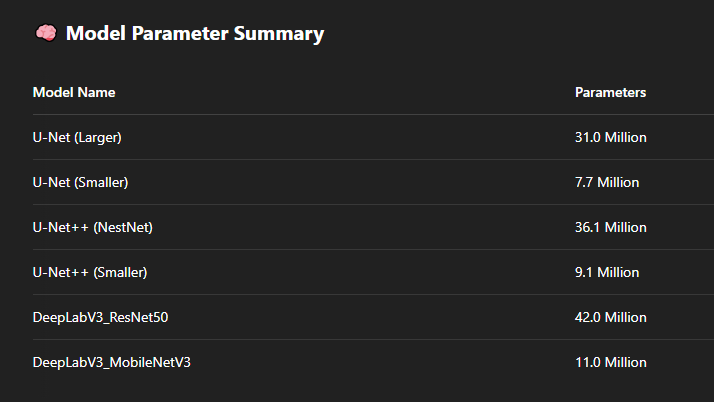

From the previous image, you can check which model you are dealing with based on your parameters

In [ ]:
import torch

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters()) / 1e6
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad) / 1e6

# Display counts in millions
print(f"🧠 Total Parameters:     {total_params:.2f}M")
print(f"🛠️ Trainable Parameters: {trainable_params:.2f}M")

🧠 Total Parameters:     11.03M
🛠️ Trainable Parameters: 11.03M


## **⚖️ Loss Function (Dynamic Weigthed Loss Function)**

### **🎀 Main Section**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DynamicWeightedCrossEntropy(nn.Module):
    def __init__(self, num_classes=15, eps=1e-7):
        super(DynamicWeightedCrossEntropy, self).__init__()
        self.num_classes = num_classes
        self.eps = eps

    def forward(self, preds, targets):
        # preds: [B, C, H, W]
        # targets: [B, H, W] with values in [0, C-1]
        B, C, H, W = preds.shape
        preds = preds.permute(0, 2, 3, 1).reshape(-1, C)  # [B*H*W, C]
        targets = targets.view(-1)  # [B*H*W]

        # Class distribution from ground truth
        pixel_counts = torch.bincount(targets, minlength=self.num_classes).float()
        total_pixels = pixel_counts.sum() + self.eps
        class_weights = pixel_counts / total_pixels  # relative importance

        # Make sure no zero weight
        class_weights = class_weights.clamp(min=self.eps)

        # Use weighted NLL Loss
        log_probs = F.log_softmax(preds, dim=1)
        return F.nll_loss(log_probs, targets, weight=class_weights, reduction='mean')

In [ ]:
loss_function = DynamicWeightedCrossEntropy(num_classes=15)

### **🎀 ? Check Section ? (Done. You do NOT need to run it again!)**

In [ ]:
# import torch

# # Manually-defined 32x32 prediction logits and ground truth
# # Simulated logits (we define a simple case to be able to manually calculate)
# pred_hypothesis_sample = torch.zeros(1, 15, 32, 32)
# pred_hypothesis_sample[:, 3, :, :] = 10  # Model is very confident class 3 everywhere

# # Target is also class 3 everywhere
# target_hypothesis_sample = torch.full((1, 32, 32), 3)

In [ ]:
# import torch.nn.functional as F

# # Convert logits to log-softmax
# log_probs = F.log_softmax(pred_hypothesis_sample, dim=1)  # [1, 15, 32, 32]

# # Convert to [N, C] and [N]
# log_probs_flat = log_probs.permute(0, 2, 3, 1).reshape(-1, 15)
# targets_flat = target_hypothesis_sample.view(-1)

# # Manually calculate weights based on pixel frequency
# pixel_counts = torch.bincount(targets_flat, minlength=15).float()
# total_pixels = pixel_counts.sum()
# class_weights = (pixel_counts / total_pixels).clamp(min=1e-7)

# # Pick correct log prob per pixel and multiply by weights
# correct_class_log_probs = log_probs_flat[range(len(targets_flat)), targets_flat]
# loss_manual = - (class_weights[targets_flat] * correct_class_log_probs).mean()

# print("📌 Expected Manual Loss:", loss_manual.item())


In [ ]:
# loss_fn = DynamicWeightedCrossEntropy(num_classes=15)
# loss_fn_result = loss_fn(pred_hypothesis_sample, target_hypothesis_sample)

# print("🧠 Loss Function Result:", loss_fn_result.item())


In [ ]:
# print("✅ Are both losses equal?", torch.allclose(loss_manual, loss_fn_result, atol=1e-6))

## **🔧Optimizer + Lr rate**

In [ ]:
lr = 1e-4
wd = 1e-5

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=wd)

# ✅ AdamW works as efficiently as Adam in terms of convergence speed,
# but improves generalization by properly decoupling weight decay from the gradient update,
# making it the preferred choice in modern deep learning tasks (especially transformers and segmentation).

## 📉**LR Scheduler (IF required)**

In [ ]:
# print(f"Your intial LR is ===> {lr}")

In [ ]:
# from torch.optim.lr_scheduler import LambdaLR

# def custom_lr_schedule(epoch: int) -> float:
#     """
#     Defines a custom learning rate multiplier based on the epoch number.

#     Returns a scaling factor that adjusts the base learning rate of the optimizer.

#     Epoch Ranges and Corresponding Learning Rates (if base_lr is 1e-2):
#     - Epochs 0 to 4   → lr = 1e-2
#     - Epochs 5 to 14  → lr = 1e-3
#     - Epochs 15 to 24 → lr = 1e-4
#     - Epochs 25+      → lr = 1e-5

#     Args:
#         epoch (int): The current training epoch (starting from 0).

#     Returns:
#         float: A multiplier for the base learning rate.
#     """
#     if epoch < 5:
#         return 1.0      # Base LR (e.g., 1e-2)
#     elif epoch < 15:
#         return 0.1      # 1e-3 if base is 1e-2
#     elif epoch < 25:
#         return 0.01     # 1e-4
#     else:
#         return 0.001    # 1e-5

# # Example usage:
# # Initialize your optimizer with a base learning rate of 1e-2
# # optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# # Create a LambdaLR scheduler using the custom schedule
# scheduler = LambdaLR(optimizer, lr_lambda=custom_lr_schedule)

## **📊 METRICs**

In [ ]:
import torchmetrics

In [ ]:
!pip install -U torchmetrics

In [ ]:
import torch
from torchmetrics import Accuracy, JaccardIndex  # Import necessary metrics

# Example configuration
num_classes = 15  # 14 food classes + background

# Pixel Accuracy
# ==============================================================================
# Accuracy: Correctly predicted pixels / total pixels
pixel_accuracy_macro    = Accuracy(num_classes=num_classes, average='macro', task="multiclass")
pixel_accuracy_weighted = Accuracy(num_classes=num_classes, average='weighted', task="multiclass")



# Intersection over Union (IoU)
# ==============================================================================
iou_macro    = JaccardIndex(num_classes=num_classes, task="multiclass")
iou_weighted = JaccardIndex(num_classes=num_classes, average='weighted', task="multiclass")


# We defined Dice manually since, at least at the present time, it cannot be imported.

# Dice Coefficient
# ==============================================================================
def dice_macro(preds, targets, num_classes):
    dice_scores = torch.zeros(num_classes)
    for class_idx in range(num_classes):
        class_preds = (preds == class_idx).float()
        class_targets = (targets == class_idx).float()
        intersection = (class_preds * class_targets).sum()
        union = class_preds.sum() + class_targets.sum()
        dice_scores[class_idx] = (2 * intersection) / (union + 1e-6)
    return dice_scores.mean()

# Dice (weighted): Contribution proportional to class pixel count
def dice_weighted(preds, targets, num_classes):
    dice_scores = torch.zeros(num_classes)
    pixel_counts = torch.zeros(num_classes)
    for class_idx in range(num_classes):
        class_preds = (preds == class_idx).float()
        class_targets = (targets == class_idx).float()
        intersection = (class_preds * class_targets).sum()
        union = class_preds.sum() + class_targets.sum()
        dice_scores[class_idx] = (2 * intersection) / (union + 1e-6)
        pixel_counts[class_idx] = class_targets.sum()
    total_pixels = pixel_counts.sum()
    return (dice_scores * pixel_counts / total_pixels).sum()
# ===============================================================================================================

## ✅**One more model CHECK**

In [ ]:
import torch

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters()) / 1e6
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad) / 1e6

# Display counts in millions
print(f"🧠 Total Parameters:     {total_params:.2f}M")
print(f"🛠️ Trainable Parameters: {trainable_params:.2f}M")
print()

🧠 Total Parameters:     11.03M
🛠️ Trainable Parameters: 11.03M



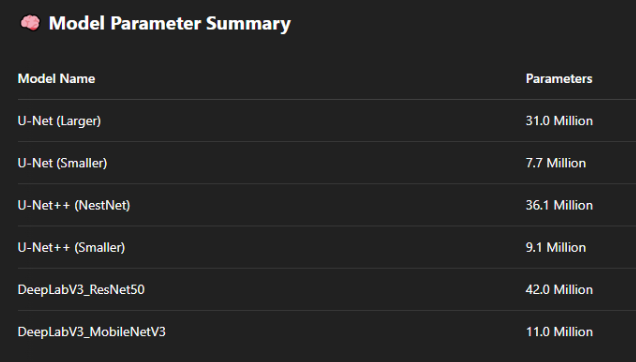

## **🔎 Evaluate METRICs before Training**

In [ ]:
from tqdm import tqdm
import torch

# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move metrics to device
pixel_accuracy_macro = pixel_accuracy_macro.to(device)
pixel_accuracy_weighted = pixel_accuracy_weighted.to(device)
iou_macro = iou_macro.to(device)
iou_weighted = iou_weighted.to(device)

# Evaluation function
def evaluate_metrics(data_loader):
    """
    Evaluate segmentation model performance on a given DataLoader.

    Returns:
        Average pixel accuracy (macro & weighted),
        Dice coefficient (macro & weighted),
        IoU (macro & weighted),
        and cross-entropy loss.
    """
    model.eval()

    total_pixel_acc_macro = 0.0
    total_pixel_acc_weighted = 0.0
    total_dice_macro = 0.0
    total_dice_weighted = 0.0
    total_iou_macro = 0.0
    total_iou_weighted = 0.0
    total_loss = 0.0
    num_batches = len(data_loader)

    with torch.no_grad():
        for images, masks in tqdm(data_loader, desc="Evaluating", leave=False, unit="batches", unit_scale=True):
            images, masks = images.to(device), masks.to(device)
            model.to(device)

            outputs = model(images)
            preds = torch.softmax(outputs, dim=1)
            preds_argmax = preds.argmax(dim=1)

            if masks.dim() == 4 and masks.size(1) == 1:
                masks = masks.squeeze(1)
            masks = masks.long()

            loss = torch.nn.functional.cross_entropy(outputs, masks)

            total_pixel_acc_macro += pixel_accuracy_macro(preds_argmax, masks)
            total_pixel_acc_weighted += pixel_accuracy_weighted(preds_argmax, masks)
            total_dice_macro += dice_macro(preds_argmax, masks, num_classes)
            total_dice_weighted += dice_weighted(preds_argmax, masks, num_classes)
            total_iou_macro += iou_macro(preds_argmax, masks)
            total_iou_weighted += iou_weighted(preds_argmax, masks)
            total_loss += loss.item()

    return (
        total_pixel_acc_macro / num_batches,
        total_pixel_acc_weighted / num_batches,
        total_dice_macro / num_batches,
        total_dice_weighted / num_batches,
        total_iou_macro / num_batches,
        total_iou_weighted / num_batches,
        total_loss / num_batches,
    )

# ======================== INITIAL METRICS (EPOCH 0) ===========================

# Run evaluation for training and validation sets
train_results_0 = evaluate_metrics(train_loader)
valid_results_0 = evaluate_metrics(valid_loader)

initial_metrics_epoch_0 = {
    "train_pixel_accuracy_macro":    train_results_0[0],
    "train_pixel_accuracy_weighted": train_results_0[1],
    "train_dice_macro":              train_results_0[2],
    "train_dice_weighted":           train_results_0[3],
    "train_iou_macro":               train_results_0[4],
    "train_iou_weighted":            train_results_0[5],
    "train_loss":                    train_results_0[6],

    "valid_pixel_accuracy_macro":    valid_results_0[0],
    "valid_pixel_accuracy_weighted": valid_results_0[1],
    "valid_dice_macro":              valid_results_0[2],
    "valid_dice_weighted":           valid_results_0[3],
    "valid_iou_macro":               valid_results_0[4],
    "valid_iou_weighted":            valid_results_0[5],
    "valid_loss":                    valid_results_0[6],
}

# Print the results clearly
print("📊 Epoch 0 Evaluation Metrics:")
for key, value in initial_metrics_epoch_0.items():
    print(f"{key:<35}: {value:.4f}")


📊 Epoch 0 Evaluation Metrics:
train_pixel_accuracy_macro         : 0.0669
train_pixel_accuracy_weighted      : 0.0365
train_dice_macro                   : 0.0103
train_dice_weighted                : 0.0367
train_iou_macro                    : 0.0058
train_iou_weighted                 : 0.0204
train_loss                         : 2.7175
valid_pixel_accuracy_macro         : 0.0674
valid_pixel_accuracy_weighted      : 0.0485
valid_dice_macro                   : 0.0131
valid_dice_weighted                : 0.0574
valid_iou_macro                    : 0.0080
valid_iou_weighted                 : 0.0347
valid_loss                         : 2.6930


## **Creating History for train and valid**

In [ ]:
# ==============================================================================================================================
# 📊 Metric Tracking Initialization (Train & Validation)
# This section initializes lists to track metric values across training epochs for both train and validation datasets.

# --- Train History Lists ---
# These lists will store the metric values for each epoch to monitor the training process.
train_pixel_accuracy_macro_history    = [initial_metrics_epoch_0['train_pixel_accuracy_macro']]
train_pixel_accuracy_weighted_history = [initial_metrics_epoch_0['train_pixel_accuracy_weighted']]
train_dice_macro_history              = [initial_metrics_epoch_0['train_dice_macro']]
train_dice_weighted_history           = [initial_metrics_epoch_0['train_dice_weighted']]
train_iou_macro_history               = [initial_metrics_epoch_0['train_iou_macro']]
train_iou_weighted_history            = [initial_metrics_epoch_0['train_iou_weighted']]
train_loss_history                    = [initial_metrics_epoch_0['train_loss']]

# --- Validation History Lists ---
# These lists track how the model performs on unseen data after each epoch.
valid_pixel_accuracy_macro_history    = [initial_metrics_epoch_0['valid_pixel_accuracy_macro']]
valid_pixel_accuracy_weighted_history = [initial_metrics_epoch_0['valid_pixel_accuracy_weighted']]
valid_dice_macro_history              = [initial_metrics_epoch_0['valid_dice_macro']]
valid_dice_weighted_history           = [initial_metrics_epoch_0['valid_dice_weighted']]
valid_iou_macro_history               = [initial_metrics_epoch_0['valid_iou_macro']]
valid_iou_weighted_history            = [initial_metrics_epoch_0['valid_iou_weighted']]
valid_loss_history                    = [initial_metrics_epoch_0['valid_loss']]

# 🏆 Best Metric Tracking
# These variables hold the best values seen for each validation metric across all epochs.
# They're used for early stopping, checkpointing, or analysis of peak performance.
best_pixel_accuracy_macro    = 0.0
best_pixel_accuracy_weighted = 0.0
best_dice_macro              = 0.0
best_dice_weighted           = 0.0
best_iou_macro               = 0.0
best_iou_weighted            = 0.0
best_loss                    = float('inf')  # Lower loss is better

# 🕐 Epoch Tracking for Best Metrics
# These help identify in which epoch each best metric was achieved (useful for reporting).
best_epoch_pixel_accuracy_macro    = 0
best_epoch_pixel_accuracy_weighted = 0
best_epoch_dice_macro              = 0
best_epoch_dice_weighted           = 0
best_epoch_iou_macro               = 0
best_epoch_iou_weighted            = 0
best_epoch_loss                    = 0

# 💾 Best Model Checkpoint Paths
# These will store file paths to the best-performing model checkpoints, based on each metric.
best_model_pixel_accuracy_macro    = None
best_model_pixel_accuracy_weighted = None
best_model_dice_macro              = None
best_model_dice_weighted           = None
best_model_iou_macro               = None
best_model_iou_weighted            = None
best_model_loss                    = None
# ==============================================================================================================================

## **Average Meter**

In [ ]:
class AverageMeter:
    """Computes and stores the average and current value."""

    def __init__(self):
        self.reset()

    def reset(self):
        """Reset all the values."""
        self.val = 0  # Current value
        self.avg = 0  # Average value
        self.sum = 0  # Sum of values
        self.count = 0  # Count of values

    def update(self, val, n=1):
        """Update the meter with a new value.

        Args:
            val (float): New value to add.
            n (int): Number of occurrences of the new value (default: 1).
        """
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count  # Calculate average

## **Functions**

### **train one epoch**

In [ ]:
# Training function for one epoch (with custom DICE)
def train_one_epoch(model, loader, loss_function, optimizer):
    """Train the model for one epoch in a multiclass segmentation setting."""
    model.train()

    loss_meter = AverageMeter()
    pixel_acc_macro_meter = AverageMeter()
    pixel_acc_weighted_meter = AverageMeter()
    dice_macro_meter = AverageMeter()
    dice_weighted_meter = AverageMeter()
    iou_macro_meter = AverageMeter()
    iou_weighted_meter = AverageMeter()

    for images, masks in tqdm(loader, unit="batches"):
        images, masks = images.to(device), masks.to(device)

        if masks.dim() == 4 and masks.size(1) == 1:
            masks = masks.squeeze(1)
        masks = masks.long()

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, masks)
        loss.backward()
        optimizer.step()

        preds = torch.softmax(outputs, dim=1)
        preds_argmax = preds.argmax(dim=1)

        loss_meter.update(loss.item(), images.size(0))
        pixel_acc_macro_meter.update(pixel_accuracy_macro(preds_argmax, masks), images.size(0))
        pixel_acc_weighted_meter.update(pixel_accuracy_weighted(preds_argmax, masks), images.size(0))
        dice_macro_meter.update(dice_macro(preds_argmax, masks, num_classes), images.size(0))
        dice_weighted_meter.update(dice_weighted(preds_argmax, masks, num_classes), images.size(0))
        iou_macro_meter.update(iou_macro(preds_argmax, masks), images.size(0))
        iou_weighted_meter.update(iou_weighted(preds_argmax, masks), images.size(0))

    return (
        loss_meter.avg,
        pixel_acc_macro_meter.avg,
        pixel_acc_weighted_meter.avg,
        dice_macro_meter.avg,
        dice_weighted_meter.avg,
        iou_macro_meter.avg,
        iou_weighted_meter.avg
    )

### **Valid one epoch function**

In [ ]:
# Validation function for one epoch (with custom DICE)
def valid_one_epoch(model, loader, loss_function):
    """Validate the model for one epoch in a multiclass segmentation setting."""
    model.eval()

    loss_meter = AverageMeter()
    pixel_acc_macro_meter = AverageMeter()
    pixel_acc_weighted_meter = AverageMeter()
    dice_macro_meter = AverageMeter()
    dice_weighted_meter = AverageMeter()
    iou_macro_meter = AverageMeter()
    iou_weighted_meter = AverageMeter()

    with torch.no_grad():
        for images, masks in tqdm(loader, unit="batches"):
            images, masks = images.to(device), masks.to(device)

            if masks.dim() == 4 and masks.size(1) == 1:
                masks = masks.squeeze(1)
            masks = masks.long()

            outputs = model(images)
            loss = loss_function(outputs, masks)

            preds = torch.softmax(outputs, dim=1)
            preds_argmax = preds.argmax(dim=1)

            loss_meter.update(loss.item(), images.size(0))
            pixel_acc_macro_meter.update(pixel_accuracy_macro(preds_argmax, masks), images.size(0))
            pixel_acc_weighted_meter.update(pixel_accuracy_weighted(preds_argmax, masks), images.size(0))
            dice_macro_meter.update(dice_macro(preds_argmax, masks, num_classes), images.size(0))
            dice_weighted_meter.update(dice_weighted(preds_argmax, masks, num_classes), images.size(0))
            iou_macro_meter.update(iou_macro(preds_argmax, masks), images.size(0))
            iou_weighted_meter.update(iou_weighted(preds_argmax, masks), images.size(0))

    return (
        loss_meter.avg,
        pixel_acc_macro_meter.avg,
        pixel_acc_weighted_meter.avg,
        dice_macro_meter.avg,
        dice_weighted_meter.avg,
        iou_macro_meter.avg,
        iou_weighted_meter.avg
    )

## ✅**MODEL Check again!**

In [ ]:
import torch

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters()) / 1e6
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad) / 1e6

# Display counts in millions
print(f"🧠 Total Parameters:     {total_params:.2f}M")
print(f"🛠️ Trainable Parameters: {trainable_params:.2f}M")

🧠 Total Parameters:     11.03M
🛠️ Trainable Parameters: 11.03M


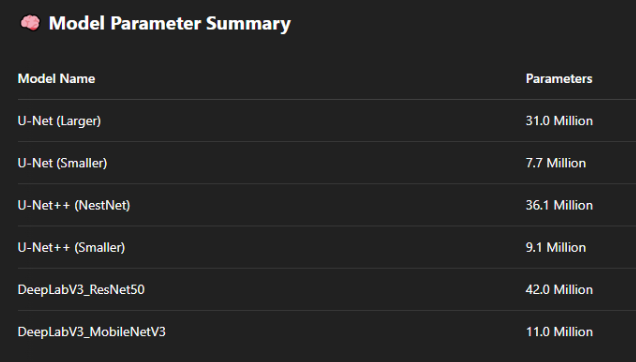

## 🔄**Training Loop + Num epochs**

In [ ]:
# macro    => unweighted
# weighted => weighted

In [ ]:
num_epochs = 20

In [ ]:
print("It is crucial to consider that, depending on your task, which metric is signficant. In this task, weighted metrics are more important for me")
print("Depending on the nature of the pronlem, class importance is directed to their contribution to the image. Therefore, in here, weighted metrics are important")
print('We also included macro metrics, which dont give a fuck about the weights, aswell. Yet, in this problem, weighted metrcis are to considder')
print("")

for epoch in range(num_epochs):
    # Print the number of epoch (starts from 1, not 0)
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Train for one epoch and get metrics
    train_loss, train_pixel_acc_macro, train_pixel_acc_weighted, train_dice_macro, train_dice_weighted, train_iou_macro, train_iou_weighted = train_one_epoch(model, train_loader, loss_function, optimizer)

    # Validate for one epoch and get metrics
    valid_loss, valid_pixel_acc_macro, valid_pixel_acc_weighted, valid_dice_macro, valid_dice_weighted, valid_iou_macro, valid_iou_weighted = valid_one_epoch(model, valid_loader, loss_function)

    # Append training metrics to history lists (for plotting later)
    train_pixel_accuracy_macro_history.append(train_pixel_acc_macro)
    train_pixel_accuracy_weighted_history.append(train_pixel_acc_weighted)
    train_dice_macro_history.append(train_dice_macro)
    train_dice_weighted_history.append(train_dice_weighted)
    train_iou_macro_history.append(train_iou_macro)
    train_iou_weighted_history.append(train_iou_weighted)

    # Append validation metrics to history lists
    valid_pixel_accuracy_macro_history.append(valid_pixel_acc_macro)
    valid_pixel_accuracy_weighted_history.append(valid_pixel_acc_weighted)
    valid_dice_macro_history.append(valid_dice_macro)
    valid_dice_weighted_history.append(valid_dice_weighted)
    valid_iou_macro_history.append(valid_iou_macro)
    valid_iou_weighted_history.append(valid_iou_weighted)

    # Append losses to history lists
    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)

    # # Print metrics for this epoch (training and validation)
    # print("Metrics")
    # print(f"Train - LOSS: {train_loss:.4f}  , METRICs =>  Pixel Acc (Macro): {train_pixel_acc_macro:.4f}, Pixel Acc (Weighted): {train_pixel_acc_weighted:.4f}, IoU (Macro): {train_iou_macro:.4f}, IoU (Weighted): {train_iou_weighted:.4f}, Dice (Macro): {train_dice_macro:.4f}, Dice (Weighted): {train_dice_weighted:.4f}")
    # print(f"Valid - LOSS: {valid_loss:.4f}  , METRICs =>  Pixel Acc (Macro): {valid_pixel_acc_macro:.4f}, Pixel Acc (Weighted): {valid_pixel_acc_weighted:.4f}, IoU (Macro): {valid_iou_macro:.4f}, IoU (Weighted): {valid_iou_weighted:.4f}, Dice (Macro): {valid_dice_macro:.4f}, Dice (Weighted): {valid_dice_weighted:.4f}")

    # METRICS
    print("Weighted Metrics (these are significant in this study):")
    print(f"Train - LOSS: {train_loss:.4f}  , METRICs =>  Pixel Acc (Weighted): {train_pixel_acc_weighted:.4f}, IoU (Weighted): {train_iou_weighted:.4f}, Dice (Weighted): {train_dice_weighted:.4f}")
    print(f"Valid - LOSS: {valid_loss:.4f}  , METRICs =>  Pixel Acc (Weighted): {valid_pixel_acc_weighted:.4f}, IoU (Weighted): {valid_iou_weighted:.4f}, Dice (Weighted): {valid_dice_weighted:.4f}")
    print()
    print("Macro Metrics (these are NOT important in this study due to the nature of the problem):")
    print(f"Train - LOSS: {train_loss:.4f}  , METRICs =>  Pixel Acc (Macro): {train_pixel_acc_macro:.4f}, IoU (Macro): {train_iou_macro:.4f}, Dice (Macro): {train_dice_macro:.4f}")
    print(f"Valid - LOSS: {valid_loss:.4f}  , METRICs =>  Pixel Acc (Macro): {valid_pixel_acc_macro:.4f}, IoU (Macro): {valid_iou_macro:.4f}, Dice (Macro): {valid_dice_macro:.4f}")
    print()


    # Print current learning rate
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Learning Rate: {current_lr:.6f}")
    print("")

    # Save best models based on validation performance
    if valid_pixel_acc_macro > best_pixel_accuracy_macro:
        best_pixel_accuracy_macro = valid_pixel_acc_macro
        best_epoch_pixel_accuracy_macro = epoch + 1
        best_model_pixel_accuracy_macro = model.state_dict()

    if valid_pixel_acc_weighted > best_pixel_accuracy_weighted:
        best_pixel_accuracy_weighted = valid_pixel_acc_weighted
        best_epoch_pixel_accuracy_weighted = epoch + 1
        best_model_pixel_accuracy_weighted = model.state_dict()

    if valid_dice_macro > best_dice_macro:
        best_dice_macro = valid_dice_macro
        best_epoch_dice_macro = epoch + 1
        best_model_dice_macro = model.state_dict()

    if valid_dice_weighted > best_dice_weighted:
        best_dice_weighted = valid_dice_weighted
        best_epoch_dice_weighted = epoch + 1
        best_model_dice_weighted = model.state_dict()

    if valid_iou_macro > best_iou_macro:
        best_iou_macro = valid_iou_macro
        best_epoch_iou_macro = epoch + 1
        best_model_iou_macro = model.state_dict()

    if valid_iou_weighted > best_iou_weighted:
        best_iou_weighted = valid_iou_weighted
        best_epoch_iou_weighted = epoch + 1
        best_model_iou_weighted = model.state_dict()

    if valid_loss < best_loss:
        best_loss = valid_loss
        best_epoch_loss = epoch + 1
        best_model_loss = model.state_dict()

    # Step the learning rate scheduler
    # lr_scheduler.step()                                                       # If required, activate this. If not, we are fine

It is crucial to consider that, depending on your task, which metric is signficant. In this task, weighted metrics are more important for me
Depending on the nature of the pronlem, class importance is directed to their contribution to the image. Therefore, in here, weighted metrics are important
We also included macro metrics, which dont give a fuck about the weights, aswell. Yet, in this problem, weighted metrcis are to considder

Epoch 1/20


100%|██████████| 27/27 [00:01<00:00, 13.92batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 1.3777  , METRICs =>  Pixel Acc (Weighted): 0.5180, IoU (Weighted): 0.4351, Dice (Weighted): 0.5143
Valid - LOSS: 1.0680  , METRICs =>  Pixel Acc (Weighted): 0.5843, IoU (Weighted): 0.5007, Dice (Weighted): 0.5648

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 1.3777  , METRICs =>  Pixel Acc (Macro): 0.1001, IoU (Macro): 0.0636, Dice (Macro): 0.0818
Valid - LOSS: 1.0680  , METRICs =>  Pixel Acc (Macro): 0.1157, IoU (Macro): 0.0800, Dice (Macro): 0.0974

Learning Rate: 0.000100

Epoch 2/20


100%|██████████| 27/27 [00:04<00:00,  6.18batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.7474  , METRICs =>  Pixel Acc (Weighted): 0.6277, IoU (Weighted): 0.5068, Dice (Weighted): 0.5855
Valid - LOSS: 0.7273  , METRICs =>  Pixel Acc (Weighted): 0.6142, IoU (Weighted): 0.4896, Dice (Weighted): 0.5613

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.7474  , METRICs =>  Pixel Acc (Macro): 0.1123, IoU (Macro): 0.0831, Dice (Macro): 0.1041
Valid - LOSS: 0.7273  , METRICs =>  Pixel Acc (Macro): 0.1155, IoU (Macro): 0.0825, Dice (Macro): 0.1012

Learning Rate: 0.000100

Epoch 3/20


100%|██████████| 27/27 [00:01<00:00, 14.75batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.5979  , METRICs =>  Pixel Acc (Weighted): 0.6546, IoU (Weighted): 0.5293, Dice (Weighted): 0.6088
Valid - LOSS: 0.6057  , METRICs =>  Pixel Acc (Weighted): 0.6491, IoU (Weighted): 0.5123, Dice (Weighted): 0.5919

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.5979  , METRICs =>  Pixel Acc (Macro): 0.1236, IoU (Macro): 0.0947, Dice (Macro): 0.1169
Valid - LOSS: 0.6057  , METRICs =>  Pixel Acc (Macro): 0.1303, IoU (Macro): 0.0970, Dice (Macro): 0.1192

Learning Rate: 0.000100

Epoch 4/20


100%|██████████| 27/27 [00:02<00:00, 13.43batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.5086  , METRICs =>  Pixel Acc (Weighted): 0.6795, IoU (Weighted): 0.5578, Dice (Weighted): 0.6386
Valid - LOSS: 0.5451  , METRICs =>  Pixel Acc (Weighted): 0.6778, IoU (Weighted): 0.5416, Dice (Weighted): 0.6248

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.5086  , METRICs =>  Pixel Acc (Macro): 0.1370, IoU (Macro): 0.1093, Dice (Macro): 0.1335
Valid - LOSS: 0.5451  , METRICs =>  Pixel Acc (Macro): 0.1477, IoU (Macro): 0.1140, Dice (Macro): 0.1390

Learning Rate: 0.000100

Epoch 5/20


100%|██████████| 27/27 [00:01<00:00, 15.77batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.4318  , METRICs =>  Pixel Acc (Weighted): 0.7111, IoU (Weighted): 0.5943, Dice (Weighted): 0.6786
Valid - LOSS: 0.5072  , METRICs =>  Pixel Acc (Weighted): 0.6944, IoU (Weighted): 0.5650, Dice (Weighted): 0.6467

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.4318  , METRICs =>  Pixel Acc (Macro): 0.1540, IoU (Macro): 0.1274, Dice (Macro): 0.1549
Valid - LOSS: 0.5072  , METRICs =>  Pixel Acc (Macro): 0.1583, IoU (Macro): 0.1245, Dice (Macro): 0.1495

Learning Rate: 0.000100

Epoch 6/20


100%|██████████| 27/27 [00:01<00:00, 16.95batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.3801  , METRICs =>  Pixel Acc (Weighted): 0.7405, IoU (Weighted): 0.6294, Dice (Weighted): 0.7140
Valid - LOSS: 0.4726  , METRICs =>  Pixel Acc (Weighted): 0.7031, IoU (Weighted): 0.5727, Dice (Weighted): 0.6560

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.3801  , METRICs =>  Pixel Acc (Macro): 0.1708, IoU (Macro): 0.1471, Dice (Macro): 0.1752
Valid - LOSS: 0.4726  , METRICs =>  Pixel Acc (Macro): 0.1631, IoU (Macro): 0.1288, Dice (Macro): 0.1546

Learning Rate: 0.000100

Epoch 7/20


100%|██████████| 27/27 [00:01<00:00, 16.48batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.3272  , METRICs =>  Pixel Acc (Weighted): 0.7727, IoU (Weighted): 0.6643, Dice (Weighted): 0.7488
Valid - LOSS: 0.4449  , METRICs =>  Pixel Acc (Weighted): 0.7215, IoU (Weighted): 0.5948, Dice (Weighted): 0.6783

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.3272  , METRICs =>  Pixel Acc (Macro): 0.1866, IoU (Macro): 0.1633, Dice (Macro): 0.1931
Valid - LOSS: 0.4449  , METRICs =>  Pixel Acc (Macro): 0.1742, IoU (Macro): 0.1415, Dice (Macro): 0.1682

Learning Rate: 0.000100

Epoch 8/20


100%|██████████| 27/27 [00:02<00:00, 12.92batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.2888  , METRICs =>  Pixel Acc (Weighted): 0.7938, IoU (Weighted): 0.6889, Dice (Weighted): 0.7726
Valid - LOSS: 0.4234  , METRICs =>  Pixel Acc (Weighted): 0.7303, IoU (Weighted): 0.6080, Dice (Weighted): 0.6927

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.2888  , METRICs =>  Pixel Acc (Macro): 0.1976, IoU (Macro): 0.1756, Dice (Macro): 0.2059
Valid - LOSS: 0.4234  , METRICs =>  Pixel Acc (Macro): 0.1829, IoU (Macro): 0.1520, Dice (Macro): 0.1796

Learning Rate: 0.000100

Epoch 9/20


100%|██████████| 27/27 [00:01<00:00, 16.92batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.2589  , METRICs =>  Pixel Acc (Weighted): 0.8170, IoU (Weighted): 0.7136, Dice (Weighted): 0.7959
Valid - LOSS: 0.4251  , METRICs =>  Pixel Acc (Weighted): 0.7397, IoU (Weighted): 0.6242, Dice (Weighted): 0.7045

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.2589  , METRICs =>  Pixel Acc (Macro): 0.2116, IoU (Macro): 0.1906, Dice (Macro): 0.2203
Valid - LOSS: 0.4251  , METRICs =>  Pixel Acc (Macro): 0.1886, IoU (Macro): 0.1565, Dice (Macro): 0.1833

Learning Rate: 0.000100

Epoch 10/20


100%|██████████| 27/27 [00:02<00:00, 12.40batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.2277  , METRICs =>  Pixel Acc (Weighted): 0.8357, IoU (Weighted): 0.7340, Dice (Weighted): 0.8147
Valid - LOSS: 0.4058  , METRICs =>  Pixel Acc (Weighted): 0.7512, IoU (Weighted): 0.6321, Dice (Weighted): 0.7159

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.2277  , METRICs =>  Pixel Acc (Macro): 0.2232, IoU (Macro): 0.2035, Dice (Macro): 0.2335
Valid - LOSS: 0.4058  , METRICs =>  Pixel Acc (Macro): 0.1963, IoU (Macro): 0.1655, Dice (Macro): 0.1946

Learning Rate: 0.000100

Epoch 11/20


100%|██████████| 27/27 [00:03<00:00,  8.22batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.2023  , METRICs =>  Pixel Acc (Weighted): 0.8483, IoU (Weighted): 0.7498, Dice (Weighted): 0.8297
Valid - LOSS: 0.3890  , METRICs =>  Pixel Acc (Weighted): 0.7517, IoU (Weighted): 0.6341, Dice (Weighted): 0.7163

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.2023  , METRICs =>  Pixel Acc (Macro): 0.2326, IoU (Macro): 0.2125, Dice (Macro): 0.2429
Valid - LOSS: 0.3890  , METRICs =>  Pixel Acc (Macro): 0.1946, IoU (Macro): 0.1629, Dice (Macro): 0.1910

Learning Rate: 0.000100

Epoch 12/20


100%|██████████| 27/27 [00:03<00:00,  7.84batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.1778  , METRICs =>  Pixel Acc (Weighted): 0.8627, IoU (Weighted): 0.7663, Dice (Weighted): 0.8430
Valid - LOSS: 0.3813  , METRICs =>  Pixel Acc (Weighted): 0.7708, IoU (Weighted): 0.6595, Dice (Weighted): 0.7404

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.1778  , METRICs =>  Pixel Acc (Macro): 0.2390, IoU (Macro): 0.2201, Dice (Macro): 0.2493
Valid - LOSS: 0.3813  , METRICs =>  Pixel Acc (Macro): 0.2080, IoU (Macro): 0.1772, Dice (Macro): 0.2056

Learning Rate: 0.000100

Epoch 13/20


100%|██████████| 27/27 [00:04<00:00,  6.32batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.1629  , METRICs =>  Pixel Acc (Weighted): 0.8729, IoU (Weighted): 0.7814, Dice (Weighted): 0.8562
Valid - LOSS: 0.3890  , METRICs =>  Pixel Acc (Weighted): 0.7612, IoU (Weighted): 0.6509, Dice (Weighted): 0.7309

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.1629  , METRICs =>  Pixel Acc (Macro): 0.2471, IoU (Macro): 0.2289, Dice (Macro): 0.2578
Valid - LOSS: 0.3890  , METRICs =>  Pixel Acc (Macro): 0.2057, IoU (Macro): 0.1765, Dice (Macro): 0.2049

Learning Rate: 0.000100

Epoch 14/20


100%|██████████| 27/27 [00:03<00:00,  7.13batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.1542  , METRICs =>  Pixel Acc (Weighted): 0.8802, IoU (Weighted): 0.7916, Dice (Weighted): 0.8638
Valid - LOSS: 0.3773  , METRICs =>  Pixel Acc (Weighted): 0.7770, IoU (Weighted): 0.6702, Dice (Weighted): 0.7510

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.1542  , METRICs =>  Pixel Acc (Macro): 0.2525, IoU (Macro): 0.2353, Dice (Macro): 0.2629
Valid - LOSS: 0.3773  , METRICs =>  Pixel Acc (Macro): 0.2127, IoU (Macro): 0.1844, Dice (Macro): 0.2134

Learning Rate: 0.000100

Epoch 15/20


100%|██████████| 27/27 [00:02<00:00, 13.32batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.1377  , METRICs =>  Pixel Acc (Weighted): 0.8880, IoU (Weighted): 0.8015, Dice (Weighted): 0.8722
Valid - LOSS: 0.3784  , METRICs =>  Pixel Acc (Weighted): 0.7689, IoU (Weighted): 0.6586, Dice (Weighted): 0.7378

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.1377  , METRICs =>  Pixel Acc (Macro): 0.2585, IoU (Macro): 0.2423, Dice (Macro): 0.2704
Valid - LOSS: 0.3784  , METRICs =>  Pixel Acc (Macro): 0.2085, IoU (Macro): 0.1795, Dice (Macro): 0.2077

Learning Rate: 0.000100

Epoch 16/20


100%|██████████| 27/27 [00:01<00:00, 16.81batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.1283  , METRICs =>  Pixel Acc (Weighted): 0.8935, IoU (Weighted): 0.8096, Dice (Weighted): 0.8778
Valid - LOSS: 0.3750  , METRICs =>  Pixel Acc (Weighted): 0.7730, IoU (Weighted): 0.6670, Dice (Weighted): 0.7453

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.1283  , METRICs =>  Pixel Acc (Macro): 0.2638, IoU (Macro): 0.2479, Dice (Macro): 0.2754
Valid - LOSS: 0.3750  , METRICs =>  Pixel Acc (Macro): 0.2140, IoU (Macro): 0.1838, Dice (Macro): 0.2122

Learning Rate: 0.000100

Epoch 17/20


100%|██████████| 27/27 [00:01<00:00, 17.09batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.1199  , METRICs =>  Pixel Acc (Weighted): 0.8978, IoU (Weighted): 0.8167, Dice (Weighted): 0.8835
Valid - LOSS: 0.3840  , METRICs =>  Pixel Acc (Weighted): 0.7852, IoU (Weighted): 0.6833, Dice (Weighted): 0.7598

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.1199  , METRICs =>  Pixel Acc (Macro): 0.2659, IoU (Macro): 0.2507, Dice (Macro): 0.2783
Valid - LOSS: 0.3840  , METRICs =>  Pixel Acc (Macro): 0.2230, IoU (Macro): 0.1923, Dice (Macro): 0.2206

Learning Rate: 0.000100

Epoch 18/20


100%|██████████| 27/27 [00:01<00:00, 14.67batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.1142  , METRICs =>  Pixel Acc (Weighted): 0.9013, IoU (Weighted): 0.8217, Dice (Weighted): 0.8868
Valid - LOSS: 0.3837  , METRICs =>  Pixel Acc (Weighted): 0.7755, IoU (Weighted): 0.6771, Dice (Weighted): 0.7537

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.1142  , METRICs =>  Pixel Acc (Macro): 0.2696, IoU (Macro): 0.2547, Dice (Macro): 0.2812
Valid - LOSS: 0.3837  , METRICs =>  Pixel Acc (Macro): 0.2187, IoU (Macro): 0.1916, Dice (Macro): 0.2192

Learning Rate: 0.000100

Epoch 19/20


100%|██████████| 27/27 [00:01<00:00, 15.03batches/s]


Weighted Metrics (these are significant in this study):
Train - LOSS: 0.1091  , METRICs =>  Pixel Acc (Weighted): 0.9048, IoU (Weighted): 0.8268, Dice (Weighted): 0.8909
Valid - LOSS: 0.3806  , METRICs =>  Pixel Acc (Weighted): 0.7890, IoU (Weighted): 0.6867, Dice (Weighted): 0.7606

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.1091  , METRICs =>  Pixel Acc (Macro): 0.2726, IoU (Macro): 0.2575, Dice (Macro): 0.2840
Valid - LOSS: 0.3806  , METRICs =>  Pixel Acc (Macro): 0.2226, IoU (Macro): 0.1952, Dice (Macro): 0.2221

Learning Rate: 0.000100

Epoch 20/20


100%|██████████| 27/27 [00:01<00:00, 17.08batches/s]

Weighted Metrics (these are significant in this study):
Train - LOSS: 0.1023  , METRICs =>  Pixel Acc (Weighted): 0.9062, IoU (Weighted): 0.8290, Dice (Weighted): 0.8924
Valid - LOSS: 0.3780  , METRICs =>  Pixel Acc (Weighted): 0.7846, IoU (Weighted): 0.6872, Dice (Weighted): 0.7592

Macro Metrics (these are NOT important in this study due to the nature of the problem):
Train - LOSS: 0.1023  , METRICs =>  Pixel Acc (Macro): 0.2743, IoU (Macro): 0.2601, Dice (Macro): 0.2868
Valid - LOSS: 0.3780  , METRICs =>  Pixel Acc (Macro): 0.2199, IoU (Macro): 0.1909, Dice (Macro): 0.2174

Learning Rate: 0.000100



## 🔎 **Performance Evaluation (based on Validation!)**

### **Based on Epoch**

In [ ]:
# After the training loop

# Pixel Accuracy
print(f"Best Pixel Accuracy (Macro):      {best_pixel_accuracy_macro:.4f}      at Epoch    {best_epoch_pixel_accuracy_macro}")
print(f"Best Pixel Accuracy (Weighted):   {best_pixel_accuracy_weighted:.4f}   at Epoch    {best_epoch_pixel_accuracy_weighted}")
print("")
# IoU
print(f"Best IoU (Macro):                 {best_iou_macro:.4f}                 at Epoch    {best_epoch_iou_macro}")
print(f"Best IoU (Weighted):              {best_iou_weighted:.4f}              at Epoch    {best_epoch_iou_weighted}")
print("")
# Dice Coefficient
print(f"Best Dice Coefficient (Macro):    {best_dice_macro:.4f}               at Epoch    {best_epoch_dice_macro}")
print(f"Best Dice Coefficient (Weighted): {best_dice_weighted:.4f}            at Epoch    {best_epoch_dice_weighted}")
print("")
# Loss
print(f"Best (least) LOSS:                {best_loss:.4f}                     at Epoch    {best_epoch_loss}")


Best Metrics and Corresponding Epochs (Based on test, NOT train):

Best Pixel Accuracy (Macro):      0.2230      at Epoch    17
Best Pixel Accuracy (Weighted):   0.7890   at Epoch    19

Best IoU (Macro):                 0.1952                 at Epoch    19
Best IoU (Weighted):              0.6872              at Epoch    20

Best Dice Coefficient (Macro):    0.2221               at Epoch    19
Best Dice Coefficient (Weighted): 0.7606            at Epoch    19

Best (least) LOSS:                0.3750                     at Epoch    16


### **Based on Graphs**

#### Pixel Acc

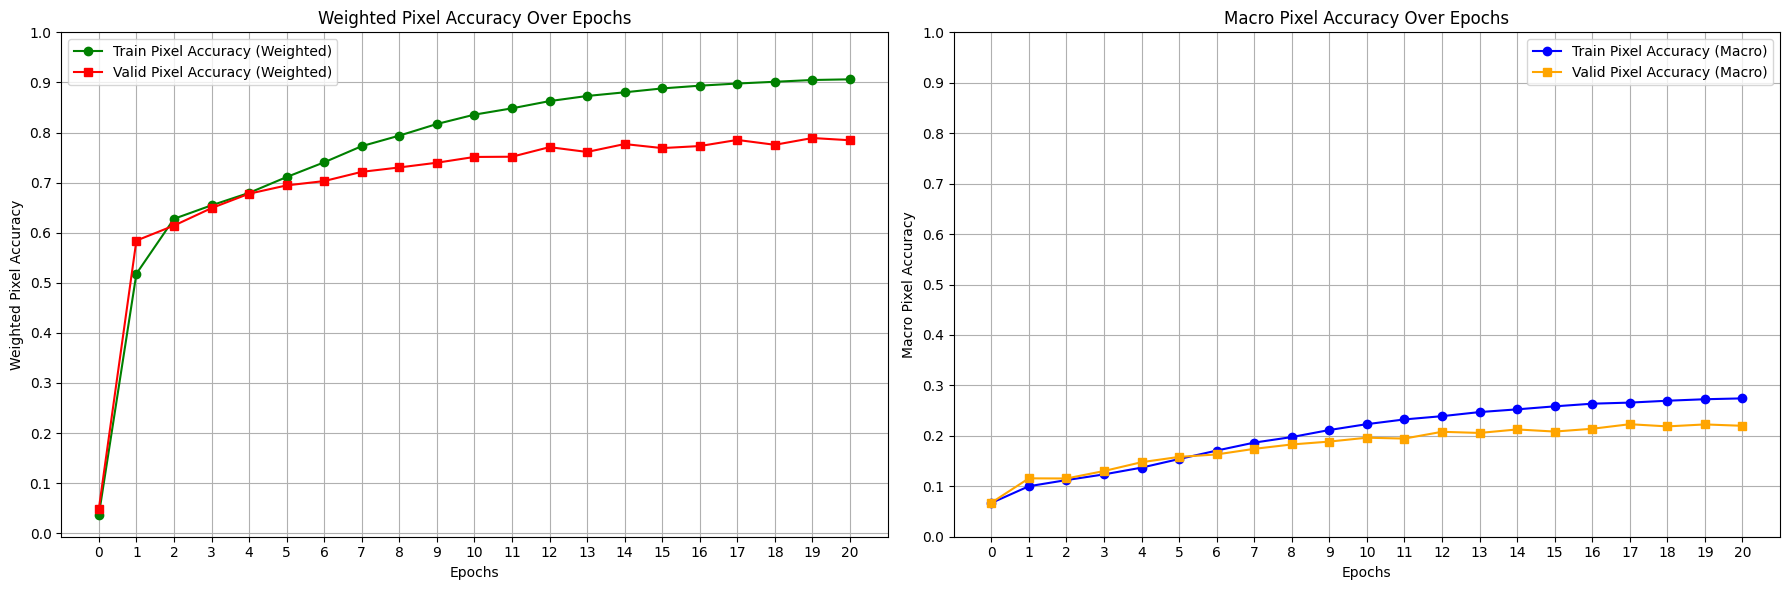

In [ ]:
# Picel Accuracy

# Fix: Match lengths based on the minimum across all histories
min_len = min(len(train_pixel_accuracy_weighted_history), len(valid_pixel_accuracy_weighted_history),
              len(train_pixel_accuracy_macro_history), len(valid_pixel_accuracy_macro_history))
epochs_range = range(min_len)

# Combined Plot: Weighted (Left) and Macro (Right) Pixel Accuracy
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Weighted Pixel Accuracy Plot (Left)
axs[0].plot(epochs_range, [x.cpu().numpy() for x in train_pixel_accuracy_weighted_history[:min_len]], 'o-', color='green', label='Train Pixel Accuracy (Weighted)')
axs[0].plot(epochs_range, [x.cpu().numpy() for x in valid_pixel_accuracy_weighted_history[:min_len]], 's-', color='red', label='Valid Pixel Accuracy (Weighted)')
axs[0].set_title('Weighted Pixel Accuracy Over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Weighted Pixel Accuracy')
axs[0].set_yticks([i * 0.1 for i in range(11)])
axs[0].set_xticks(epochs_range)
axs[0].legend()
axs[0].grid(True)

# Macro Pixel Accuracy Plot (Right)
axs[1].plot(epochs_range, [x.cpu().numpy() for x in train_pixel_accuracy_macro_history[:min_len]], 'o-', color='blue', label='Train Pixel Accuracy (Macro)')
axs[1].plot(epochs_range, [x.cpu().numpy() for x in valid_pixel_accuracy_macro_history[:min_len]], 's-', color='orange', label='Valid Pixel Accuracy (Macro)')
axs[1].set_title('Macro Pixel Accuracy Over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Macro Pixel Accuracy')
axs[1].set_yticks([i * 0.1 for i in range(11)])
axs[1].set_xticks(epochs_range)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

#### IoU

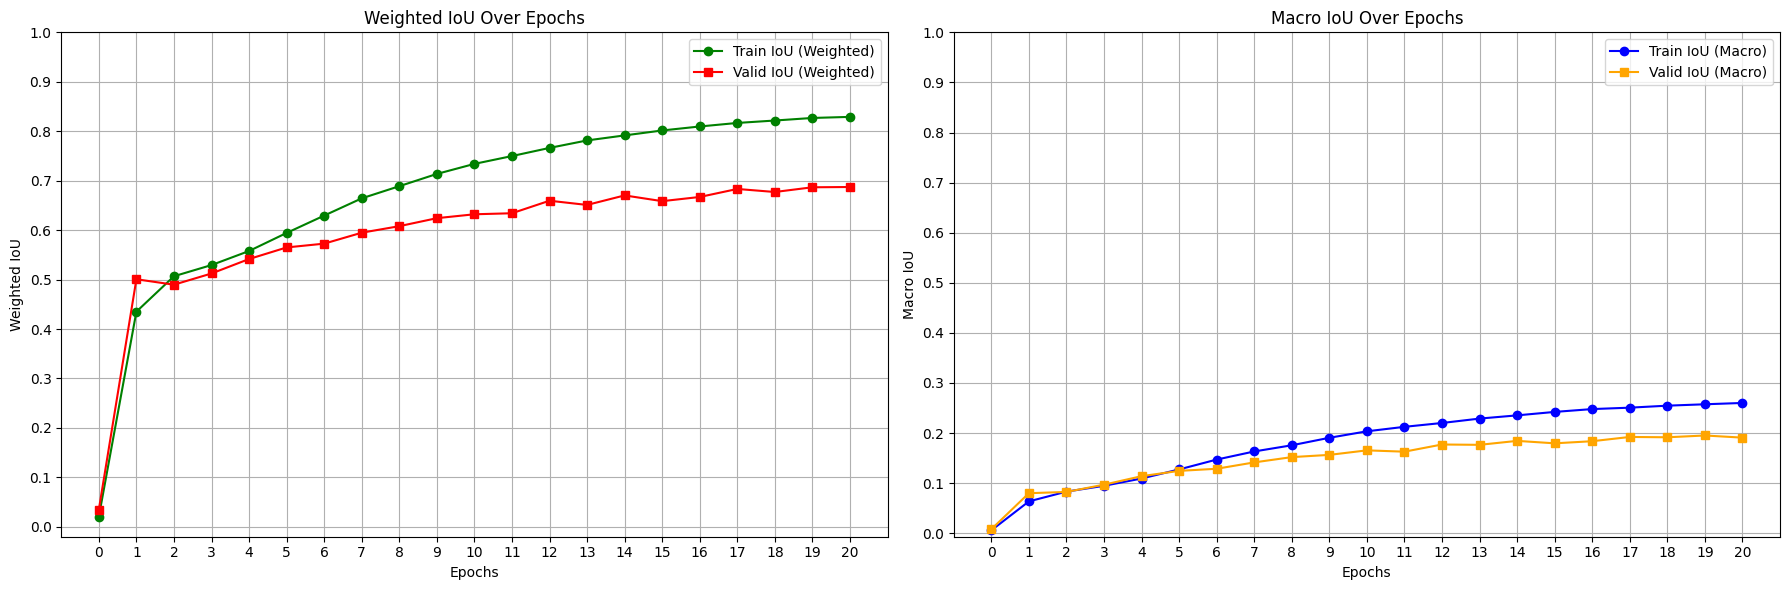

In [ ]:
# Fix: Match lengths based on the minimum across all IoU histories
min_len_iou = min(len(train_iou_weighted_history), len(valid_iou_weighted_history),
                  len(train_iou_macro_history), len(valid_iou_macro_history))
epochs_range_iou = range(min_len_iou)

# Combined Plot: Weighted (Left) and Macro (Right) IoU
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Weighted IoU Plot (Left)
axs[0].plot(epochs_range_iou, [x.cpu().numpy() for x in train_iou_weighted_history[:min_len_iou]], 'o-', color='green', label='Train IoU (Weighted)')
axs[0].plot(epochs_range_iou, [x.cpu().numpy() for x in valid_iou_weighted_history[:min_len_iou]], 's-', color='red', label='Valid IoU (Weighted)')
axs[0].set_title('Weighted IoU Over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Weighted IoU')
axs[0].set_yticks([i * 0.1 for i in range(11)])
axs[0].set_xticks(epochs_range_iou)
axs[0].legend()
axs[0].grid(True)

# Macro IoU Plot (Right)
axs[1].plot(epochs_range_iou, [x.cpu().numpy() for x in train_iou_macro_history[:min_len_iou]], 'o-', color='blue', label='Train IoU (Macro)')
axs[1].plot(epochs_range_iou, [x.cpu().numpy() for x in valid_iou_macro_history[:min_len_iou]], 's-', color='orange', label='Valid IoU (Macro)')
axs[1].set_title('Macro IoU Over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Macro IoU')
axs[1].set_yticks([i * 0.1 for i in range(11)])
axs[1].set_xticks(epochs_range_iou)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


#### Dice

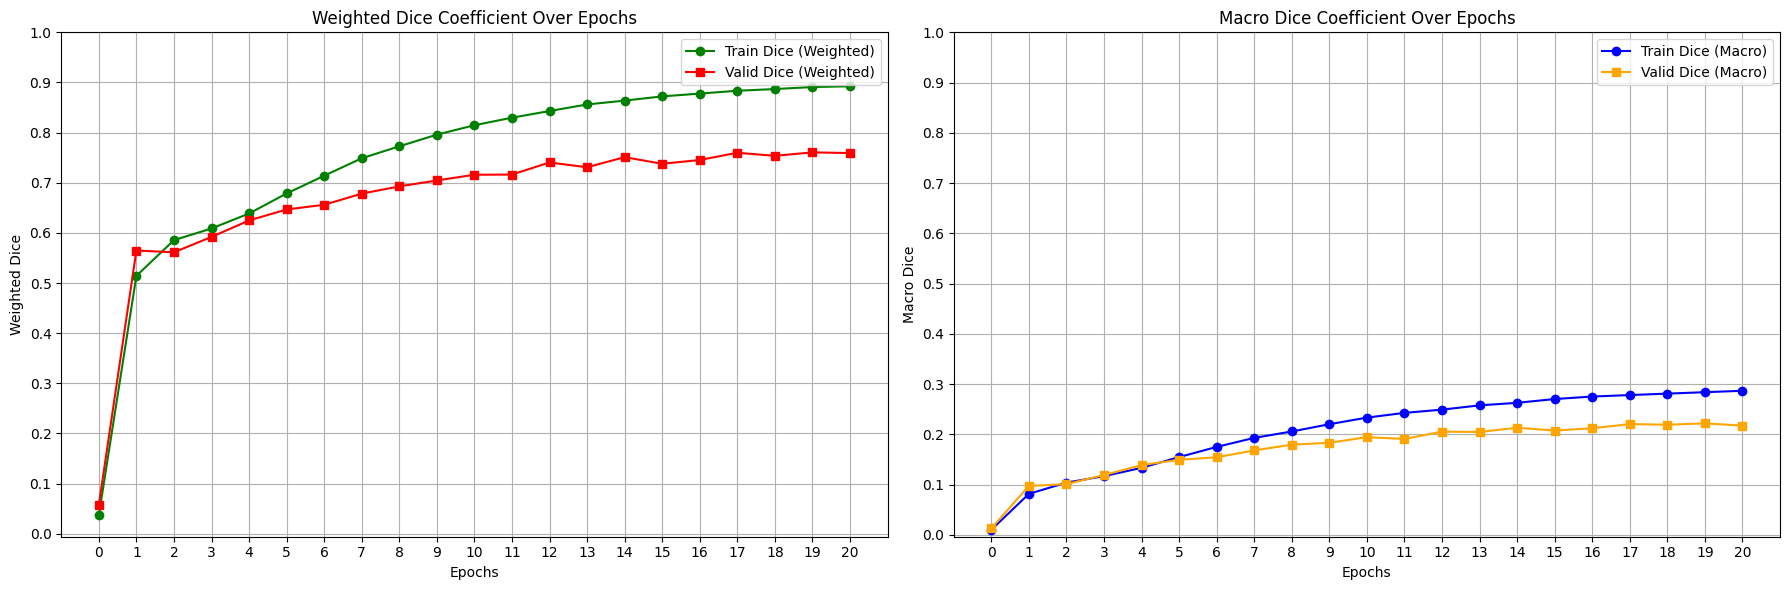

In [ ]:
# Fix: Match lengths based on the minimum across all Dice histories
min_len_dice = min(len(train_dice_weighted_history), len(valid_dice_weighted_history),
                   len(train_dice_macro_history), len(valid_dice_macro_history))
epochs_range_dice = range(min_len_dice)

# Combined Plot: Weighted (Left) and Macro (Right) Dice
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Weighted Dice Plot (Left)
axs[0].plot(epochs_range_dice, [x.cpu().numpy() for x in train_dice_weighted_history[:min_len_dice]], 'o-', color='green', label='Train Dice (Weighted)')
axs[0].plot(epochs_range_dice, [x.cpu().numpy() for x in valid_dice_weighted_history[:min_len_dice]], 's-', color='red', label='Valid Dice (Weighted)')
axs[0].set_title('Weighted Dice Coefficient Over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Weighted Dice')
axs[0].set_yticks([i * 0.1 for i in range(11)])
axs[0].set_xticks(epochs_range_dice)
axs[0].legend()
axs[0].grid(True)

# Macro Dice Plot (Right)
axs[1].plot(epochs_range_dice, [x.cpu().numpy() for x in train_dice_macro_history[:min_len_dice]], 'o-', color='blue', label='Train Dice (Macro)')
axs[1].plot(epochs_range_dice, [x.cpu().numpy() for x in valid_dice_macro_history[:min_len_dice]], 's-', color='orange', label='Valid Dice (Macro)')
axs[1].set_title('Macro Dice Coefficient Over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Macro Dice')
axs[1].set_yticks([i * 0.1 for i in range(11)])
axs[1].set_xticks(epochs_range_dice)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


#### LOSS

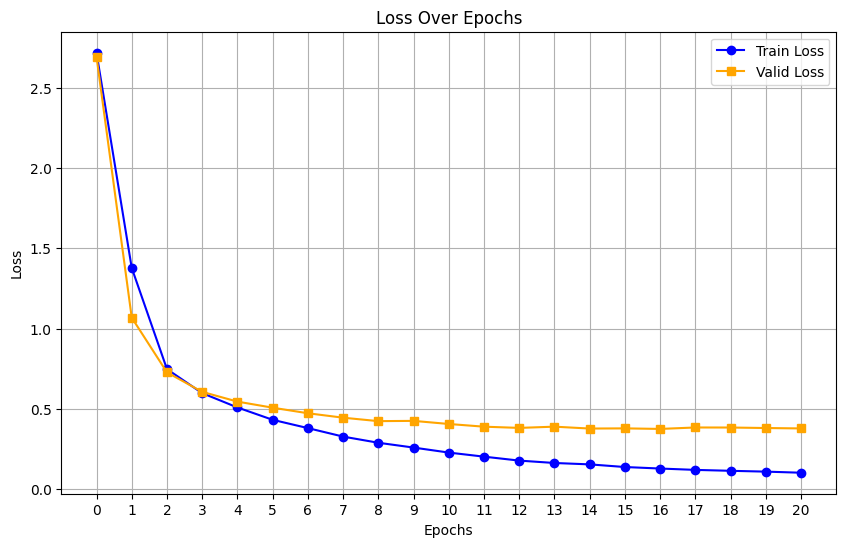

In [ ]:
# Fix: Match lengths of x and y using the shortest available history
min_len_loss = min(len(train_loss_history), len(valid_loss_history))
epochs_range_loss = range(min_len_loss)

# Plot Loss for Train and Valid
plt.figure(figsize=(10, 6))
plt.plot(epochs_range_loss, train_loss_history[:min_len_loss], 'o-', color='blue', label='Train Loss')
plt.plot(epochs_range_loss, valid_loss_history[:min_len_loss], 's-', color='orange', label='Valid Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs_range_loss)  # Show all epochs on x-axis
plt.legend()
plt.grid()
plt.show()

##

### **Based on Visualization**

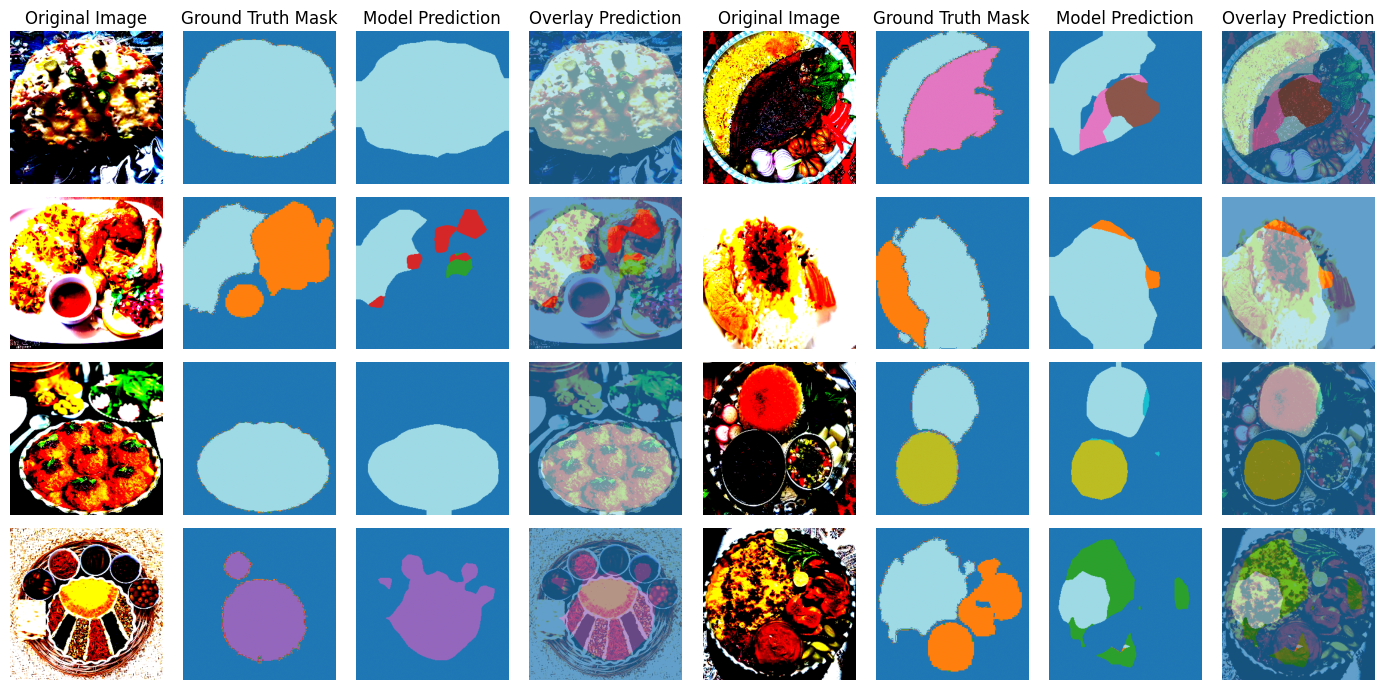

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'best_model_iou' contains the state_dict of the best model based on IoU
# Load the best model
model.load_state_dict(best_model_iou_weighted)
model.eval()  # Set the model to evaluation mode

# Move the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Get two batches from the validation loader (changed here)
dataiter = iter(valid_loader)
images1, masks1 = next(dataiter)
images2, masks2 = next(dataiter)

# Move images and masks to the device
images1, masks1 = images1.to(device), masks1.to(device)
images2, masks2 = images2.to(device), masks2.to(device)

# Disable gradient calculation for inference
with torch.no_grad():
    outputs1 = model(images1)
    outputs2 = model(images2)

# Apply softmax to get class probabilities, then take argmax to get the predicted class per pixel
predictions1 = torch.softmax(outputs1, dim=1).argmax(dim=1)
predictions2 = torch.softmax(outputs2, dim=1).argmax(dim=1)

# Move data to CPU and convert to numpy arrays for visualization
images_np1 = images1.cpu().numpy()
masks_np1 = masks1.cpu().numpy()
predictions_np1 = predictions1.cpu().numpy()

images_np2 = images2.cpu().numpy()
masks_np2 = masks2.cpu().numpy()
predictions_np2 = predictions2.cpu().numpy()

# Prepare the figure (adjusted for batch size of 4 in a 4x8 layout)
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(14, 7))

# Function to plot a single image, mask, prediction, and overlay
def plot_row(axes, row_idx, image, mask, prediction, col_offset=0):
    # Original Image
    img_disp = image.transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    img_disp = np.clip(img_disp, 0, 1)  # Ensure the image pixel values are between 0 and 1
    axes[row_idx, col_offset].imshow(img_disp)
    axes[row_idx, col_offset].axis('off')
    if row_idx == 0:
        axes[row_idx, col_offset].set_title('Original Image')

    # Ground Truth Mask
    axes[row_idx, col_offset + 1].imshow(mask.squeeze(), cmap='tab20', vmin=0, vmax=10)
    axes[row_idx, col_offset + 1].axis('off')
    if row_idx == 0:
        axes[row_idx, col_offset + 1].set_title('Ground Truth Mask')

    # Model Prediction
    axes[row_idx, col_offset + 2].imshow(prediction.squeeze(), cmap='tab20', vmin=0, vmax=10)
    axes[row_idx, col_offset + 2].axis('off')
    if row_idx == 0:
        axes[row_idx, col_offset + 2].set_title('Model Prediction')

    # Overlay of Prediction on Original Image
    prediction_colored = plt.cm.tab20(prediction / 10)[:, :, :3]  # Convert prediction to RGB using tab20 colormap
    overlay = 0.3 * img_disp + 0.7 * prediction_colored  # Blend image and colored prediction
    axes[row_idx, col_offset + 3].imshow(overlay)
    axes[row_idx, col_offset + 3].axis('off')
    if row_idx == 0:
        axes[row_idx, col_offset + 3].set_title('Overlay Prediction')

# Plot the first batch on the left (columns 0–3 for each row)
for idx in range(4):
    plot_row(axes, idx, images_np1[idx], masks_np1[idx], predictions_np1[idx], col_offset=0)

# Plot the second batch on the right (columns 4–7 for each row)
for idx in range(4):
    plot_row(axes, idx, images_np2[idx], masks_np2[idx], predictions_np2[idx], col_offset=4)

plt.tight_layout()
plt.show()

## 🔎✅**Performance based on Test Data**

### **Based on Numbers**

In [ ]:
# =========================== Cell 1: Evaluate Best Model on Test Data ===========================
# Load the best model based on weighted IoU
model.load_state_dict(best_model_iou_weighted)
model.to(device)
model.eval()

# Initialize accumulators
pixel_acc_weighted_total = 0.0
iou_weighted_total = 0.0
dice_weighted_total = 0.0

pixel_acc_macro_total = 0.0
iou_macro_total = 0.0
dice_macro_total = 0.0

total_samples = 0

# Evaluate on test set
with torch.no_grad():
    for images, masks in test_loader:
        images, masks = images.to(device), masks.to(device)

        if masks.dim() == 4 and masks.size(1) == 1:
            masks = masks.squeeze(1)
        masks = masks.long()

        outputs = model(images)
        preds = torch.softmax(outputs, dim=1).argmax(dim=1)
        batch_size = images.size(0)
        total_samples += batch_size

        # Weighted
        pixel_acc_weighted_total += pixel_accuracy_weighted(preds, masks) * batch_size
        iou_weighted_total += iou_weighted(preds, masks) * batch_size
        dice_weighted_total += dice_weighted(preds, masks, num_classes) * batch_size

        # Macro
        pixel_acc_macro_total += pixel_accuracy_macro(preds, masks) * batch_size
        iou_macro_total += iou_macro(preds, masks) * batch_size
        dice_macro_total += dice_macro(preds, masks, num_classes) * batch_size

# Compute averages
pixel_acc_weighted_test = pixel_acc_weighted_total / total_samples
iou_weighted_test = iou_weighted_total / total_samples
dice_weighted_test = dice_weighted_total / total_samples

pixel_acc_macro_test = pixel_acc_macro_total / total_samples
iou_macro_test = iou_macro_total / total_samples
dice_macro_test = dice_macro_total / total_samples

# Print final test metrics
print("📊 Final Test Evaluation with Best IoU-Weighted Model")
print("In this study, weighted is importat! You should consider which one is significant to you always")
print()
print(f"Weighted  - Pixel Acc: {pixel_acc_weighted_test:.6f}, IoU: {iou_weighted_test:.6f}, Dice: {dice_weighted_test:.6f}")
print(f"Macro     - Pixel Acc: {pixel_acc_macro_test:.6f}, IoU: {iou_macro_test:.6f}, Dice: {dice_macro_test:.6f}")

📊 Final Test Evaluation with Best IoU-Weighted Model
In this study, weighted is importat! You should consider which one is significant to you always

Weighted  - Pixel Acc: 0.815102, IoU: 0.733157, Dice: 0.803303
Macro     - Pixel Acc: 0.237726, IoU: 0.210380, Dice: 0.240590


### **Based on Visualization**

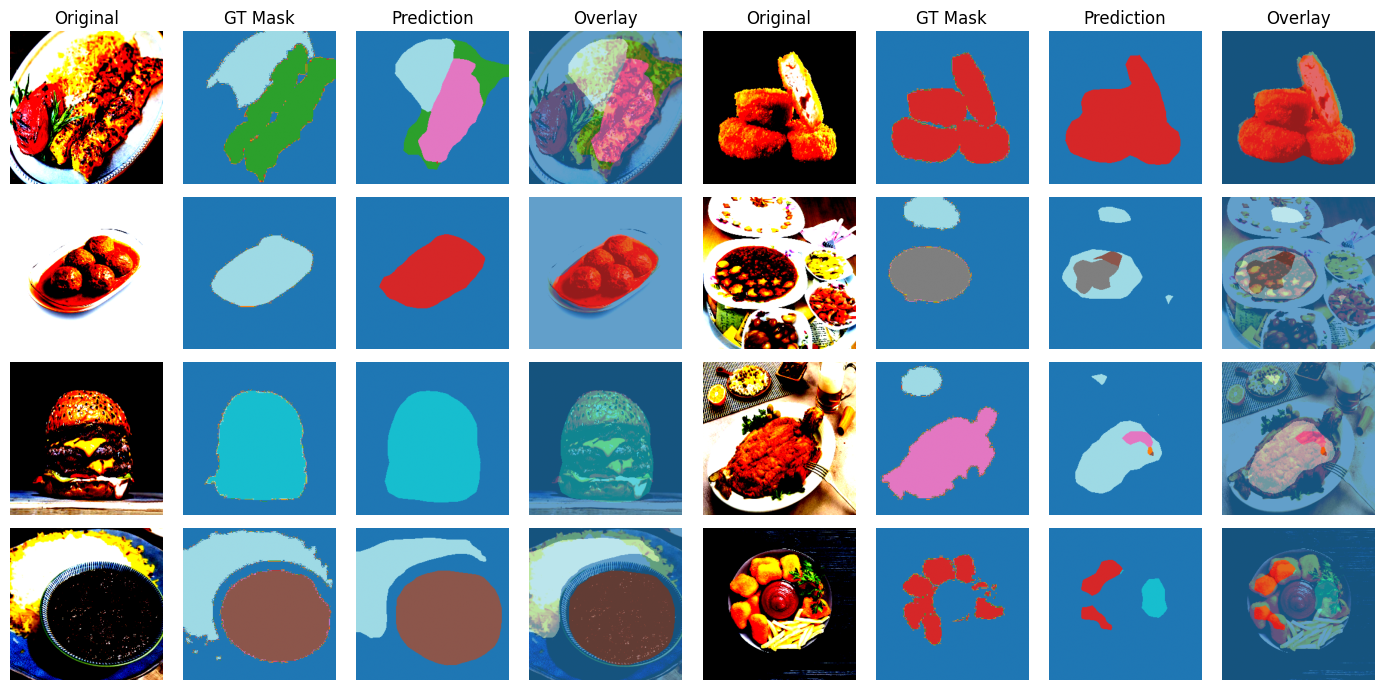

In [ ]:
# =========================== Cell 2: Visualize Segmentation on Test Data ===========================
import matplotlib.pyplot as plt
import numpy as np
import torch

# Load the best model based on weighted IoU
model.load_state_dict(best_model_iou_weighted)
model.to(device)
model.eval()

# Get two batches from the test loader
dataiter = iter(test_loader)
images1, masks1 = next(dataiter)
images2, masks2 = next(dataiter)

# Move to device
images1, masks1 = images1.to(device), masks1.to(device)
images2, masks2 = images2.to(device), masks2.to(device)

# Perform inference
with torch.no_grad():
    outputs1 = model(images1)
    outputs2 = model(images2)

# Get predicted masks
preds1 = torch.softmax(outputs1, dim=1).argmax(dim=1)
preds2 = torch.softmax(outputs2, dim=1).argmax(dim=1)

# Convert to NumPy
images_np1 = images1.cpu().numpy()
masks_np1 = masks1.cpu().numpy()
preds_np1 = preds1.cpu().numpy()

images_np2 = images2.cpu().numpy()
masks_np2 = masks2.cpu().numpy()
preds_np2 = preds2.cpu().numpy()

# Plotting: 4x8 grid for two batches of 4 samples
fig, axes = plt.subplots(4, 8, figsize=(14, 7))

def plot_row(axs, row_idx, image, mask, pred, col_offset=0):
    # Original Image
    img_disp = image.transpose(1, 2, 0)
    img_disp = np.clip(img_disp, 0, 1)
    axs[row_idx, col_offset].imshow(img_disp)
    axs[row_idx, col_offset].axis('off')
    if row_idx == 0:
        axs[row_idx, col_offset].set_title('Original')

    # Ground Truth Mask
    axs[row_idx, col_offset + 1].imshow(mask.squeeze(), cmap='tab20', vmin=0, vmax=10)
    axs[row_idx, col_offset + 1].axis('off')
    if row_idx == 0:
        axs[row_idx, col_offset + 1].set_title('GT Mask')

    # Predicted Mask
    axs[row_idx, col_offset + 2].imshow(pred.squeeze(), cmap='tab20', vmin=0, vmax=10)
    axs[row_idx, col_offset + 2].axis('off')
    if row_idx == 0:
        axs[row_idx, col_offset + 2].set_title('Prediction')

    # Overlay
    pred_color = plt.cm.tab20(pred / 10)[:, :, :3]
    overlay = 0.3 * img_disp + 0.7 * pred_color
    axs[row_idx, col_offset + 3].imshow(overlay)
    axs[row_idx, col_offset + 3].axis('off')
    if row_idx == 0:
        axs[row_idx, col_offset + 3].set_title('Overlay')

# Plot batch 1 (left half)
for idx in range(4):
    plot_row(axes, idx, images_np1[idx], masks_np1[idx], preds_np1[idx], col_offset=0)

# Plot batch 2 (right half)
for idx in range(4):
    plot_row(axes, idx, images_np2[idx], masks_np2[idx], preds_np2[idx], col_offset=4)

plt.tight_layout()
plt.show()


## **📈 Performance Report on Test Data 🕵️ (based on the best weighted IoU)**

### **LR=1e-4, No lr scheduler, 20 Epochs (can be slightly different in each run)**

🔷 Unet (31.04 m) => Weighted - Pixel Acc: 0.609875, IoU: 0.452041, Dice: 0.534377 //// Macro - Pixel Acc: 0.094880, IoU: 0.067125, Dice: 0.086843

🔷 Smaller Unet (7.76 m)=> Weighted - Pixel Acc: 0.603011, IoU: 0.511619, Dice: 0.571182 //// Macro - Pixel Acc: 0.108544, IoU: 0.073293, Dice: 0.088891

🔷 NestNet (36.16 m) => Weighted - Pixel Acc: 0.604274, IoU: 0.408198, Dice: 0.500010 //// Macro - Pixel Acc: 0.087089, IoU: 0.060810, Dice: 0.080842

🔷 Smaller NestNet (9.04 m) => Weighted - Pixel Acc: 0.610645, IoU: 0.411098, Dice: 0.502326 //// Macro - Pixel Acc: 0.086821, IoU: 0.059386, Dice: 0.077644

🔷DeeoLabV3 with ResNet50 backbone (42 m) => Weighted - Pixel Acc: 0.842783, IoU: 0.765423, Dice: 0.826993 //// Macro - Pixel Acc: 0.250615, IoU: 0.228778, Dice: 0.253331

🔷DeeoLabV3 with MobileNetV3 backbone (11.03 m) => Weighted - Pixel Acc: 0.815102, IoU: 0.733157, Dice: 0.803303 //// Macro - Pixel Acc: 0.237726, IoU: 0.210380, Dice: 0.240590

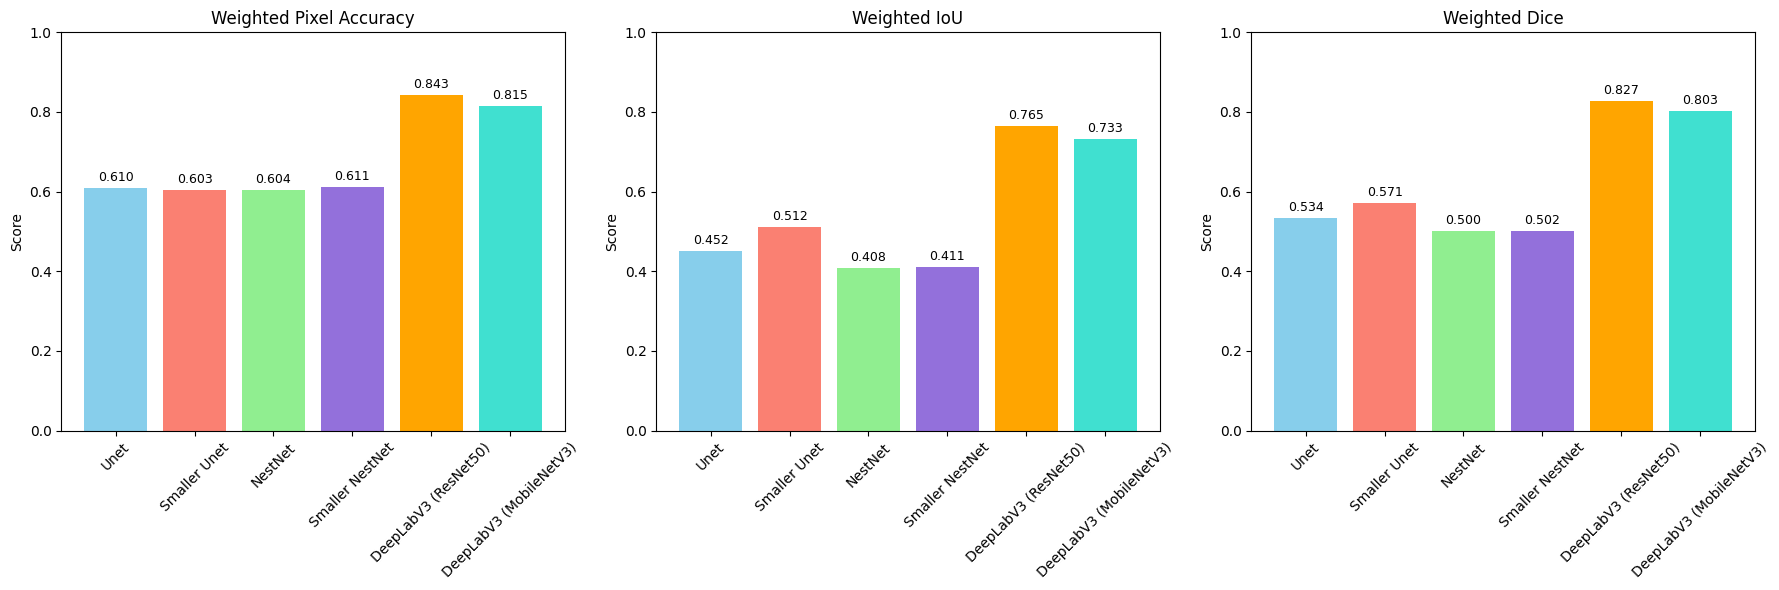

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = [
    "Unet",
    "Smaller Unet",
    "NestNet",
    "Smaller NestNet",
    "DeepLabV3 (ResNet50)",
    "DeepLabV3 (MobileNetV3)"
]

# Weighted metrics
pixel_acc = [0.610, 0.603, 0.604, 0.611, 0.843, 0.815]
iou = [0.452, 0.512, 0.408, 0.411, 0.765, 0.733]
dice = [0.534, 0.571, 0.500, 0.502, 0.827, 0.803]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

metrics = [pixel_acc, iou, dice]
titles = ['Weighted Pixel Accuracy', 'Weighted IoU', 'Weighted Dice']
colors = ['skyblue', 'salmon', 'lightgreen', 'mediumpurple', 'orange', 'turquoise']

for i in range(3):
    bars = axs[i].bar(models, metrics[i], color=colors)
    axs[i].set_title(titles[i])
    axs[i].set_ylabel('Score')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylim(0, 1)

    # Add labels on top of bars
    for bar in bars:
        height = bar.get_height()
        axs[i].text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f'{height:.3f}',
            ha='center', va='bottom', fontsize=9
        )

plt.tight_layout()
plt.show()

🧁 Since DeepLabv3 had the best performance with 0.76 Weighted IoU and 0.82 Weighted Dice, the performance visualization of that, on the test data, is reported as follow:

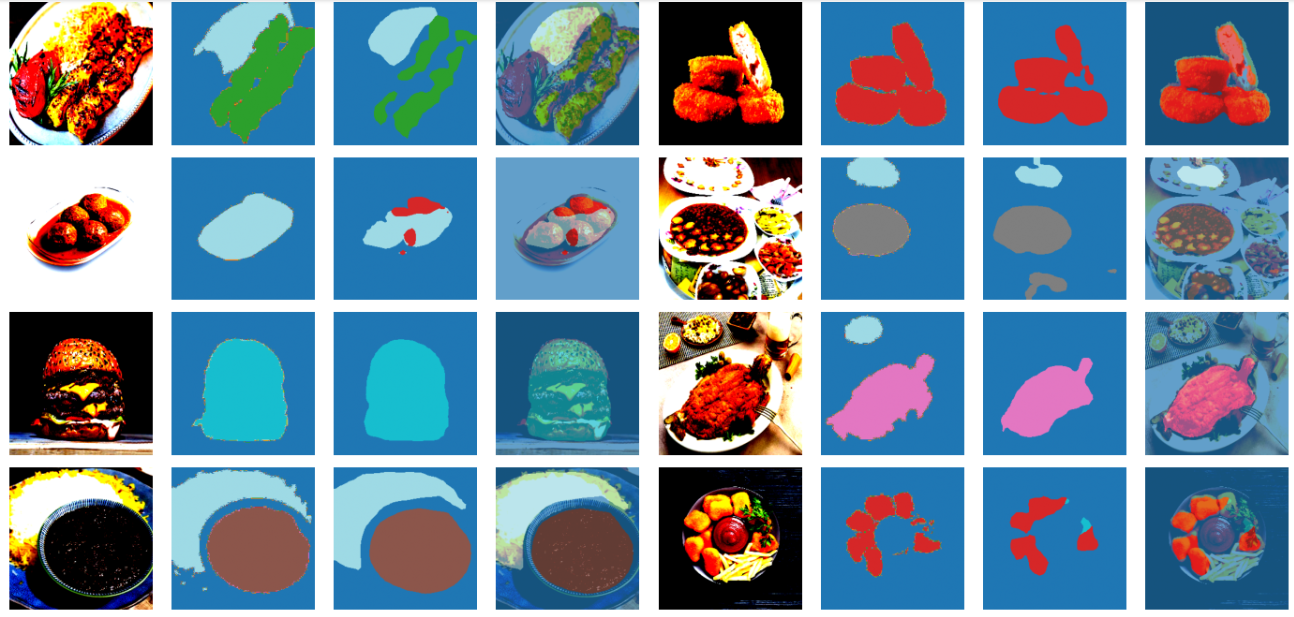